# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [122]:
import pandas as pd

In [123]:
data = pd.read_csv('real_estate_data.csv', sep='\t', decimal=',')

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

В таблице 22 столбец, 23699 - строки, большинство данных в столбцах имеют тип object, вероятно есть пропуски. Посморим на значения в некоторых строках таблицы. И найдем количество пропусков.

In [125]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Построим гистограммы для всех числовых данных**.

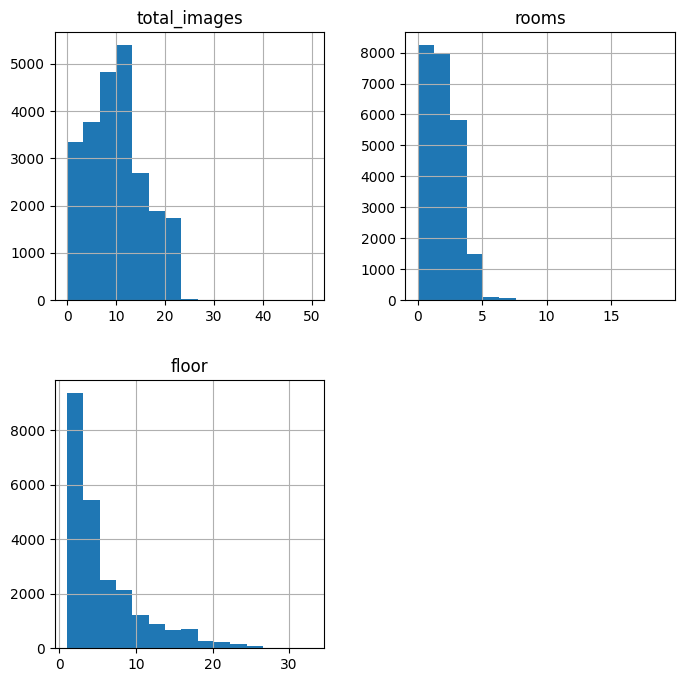

In [127]:
data.hist(figsize=(8,8), bins = 15);

# Анализ гистограмм

Проанализируем построенные гистограммы. Меняя количество корзин уточняем данные по разным гистограммам.


**Первая гистограмма** отображает количество загруженных изображений по объектам недвижимости. По гистограмме видно, что в большинстве случаев, об объекте имеется от 6 до 10 изображений, реже от 10 до 15, еще меньше от 20 до 30, но такие объекты присутствуют. И совсем мало до 30 изображений. Возможно это какие-то нетиповые квартиры.


**Вторая гистограмма** отображает "комнатность" объектов недивижимости. Больше всего объявлений о  продаже - 1х-2х комнатных квартир, чуть меньше - 3-х комнатных квартир.
В гистограмме присутствуют данные - 0-комнатных квартирах - вероятно это ошибки. Надо проверять.

*С увеличением "комнатности" количество объявлений о продажах квартир уменьшается. Это логично.*


**Третья гистограмма показывает количество объявлений по "этажности"**. Самые популярные объявления - о продаже квартир на 1-4-м этажах. Дальше на уменьшение. Чем выше "этажность" - тем меньше объявлений о продаже.

Есть небольшое количество объявлений о продаже квартир на 25 и 30 этажах.  

### Предобработка данных

In [128]:
data.isna().sum() # посчитаем количество пропусков по каждому параметру

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Пропущенные данные

Большое количество пропусков в данных. Проанализируем пропуски.

- **ceiling_height (высота потолков) - 9195**. Около 38% от общего пропущенных значений. Рассчитаем медианное значение и заполним пропуски медианой.

- **floors_total (этажность) - 86**. Пропущено немного - менее 0,3%. Эти данные удалим, их мало.

- **living_area (площадь гостинной) - 1903**. Пропущено - 8%. Это существенно. Заполним медианой.

- **is_apartment (апартаменты или нет) - 20924**. Практически везде пропуски - 88%. Можно предположить, если это были бы апартаменты, то скорее всего это было бы указано. Поэтому заменим пропущенные данные на значение False (т.е. это не апартаменты). Маловероятно, что все квартиры апартаменты.

- **kitchen_area  (площадь кухни) - 2278**. Пропущенных значений примерно столько же, сколько пропущенных значений в данных по площади гостиной - 10%.  Заполним данные медианым значением .

- **balcony (наличие балкона) - 11519**. Скорее всего незаполненные данные говорят о том, что балкон отсутствует. Поэтому заполним нулями.

- **locality_name - (название населенного пункта) - 49**. Количество пропущенных значений незначительное.

- **airports_nearest  (расстояние до ближайшего аэропорта) - 5542**. Пропущенных значений - 23%, можно заменить на 5000, полагая, что ближайший аэропорт дальше 3 км.

- **cityCenters_nearest (расстояние до центра) - 5519**. Пропущенных значений - 23%, это картографические данные. Пропущенные значения заменим на 5000, полагая что оно больше 3 км.

- **parks_around3000  (число парков в радиусе 3км) - 5518**. Пропущенных значений - 23%, это картографические данные. Пропущенные значения заменим на 5000, считаем что превышает 3 км.

- **parks_nearest (расстояние до ближайшего парка (м)) - 15620**. Пропущено 65% записей. Пропущенные значения заменим на 5000.

- **ponds_around3000  (количество водоемов в радиусе 3км) - 5518**.  Пропущенных значений - 23%, это картографические данные. Пропущенные значения заменим на 5000, считаем что превышает 3 км.  

- **ponds_nearest (расстояние до ближайшего водоема) -  14589**. Пропущенные значения  61%, заменим на - 5000, полагая, что до ближайшего водоема более 3 км.  

- **days_exposition (сколько дней было размещено объявление (от публикации до снятия)) - 3181**. Пропущено 13% записей. Заменим средним значением.

In [129]:
#Проверим названия столбцов в  датафрейме
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Здесь все нормально. Оставляем названия столбцов как есть.

**Заполним пропуски.**

Так как  столбец 'is_apartment' - наличие балкона, то логично пропущенные значения заменить на False. И преобразовать к логическому типу данных.

В столбце - 'balcony' - наличие балкона пропущенные даные заменим на 0, полагая что балкона нет. Это целочисленный тип данных, так как балконов может быть несколько. Преобразуем затем в соответсвующий типа данных.

Пропуски в столбцах 'kitchen_area', 'living_area', 'ceiling_height', 'days_exposition' заменим медианных значениям данных показателей.

Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'  оставим, при анализе данных просто не буду брать их в рассчет.

In [130]:
data['is_apartment'] = data['is_apartment'].fillna('False') # апартаменты -

In [131]:
data['balcony'] = data['balcony'].fillna(0.0)

Посчитаем медианные значения и заполним пропуски

In [132]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [133]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [135]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [136]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Можно было бы заполнить пропуски медианами. В признаке высот можно было заполнить пропуски более точно: рассчитать медианы отдельно для каждого населенного пункта и использовать их. А для параметров площадей можно использовать более точный способ: отталкиваться от общей площади квартиры (посчитать коэффициент отношения например жилой площади к общей и за счет него заполнить пропуски).

Удалим пропуски в столбцах  'floors_total', 'locality_name'. Это не повлияет на выборку, так как таких записей меньше процента.

In [137]:
data.dropna(subset=['floors_total'], how='all', inplace=True)

In [138]:
data.dropna(subset=['locality_name'], how='all', inplace=True)

Посмотрим данные в таблице. Снова проверим данные на пропуски. Пропуски остались в столбцах  'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'. Будем об этом помнить.

In [139]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,False,...,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [140]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64

Поверим, что с типами данных

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23565 non-null  int64 
 1   last_price            23565 non-null  object
 2   total_area            23565 non-null  object
 3   first_day_exposition  23565 non-null  object
 4   rooms                 23565 non-null  int64 
 5   ceiling_height        23565 non-null  object
 6   floors_total          23565 non-null  object
 7   living_area           23565 non-null  object
 8   floor                 23565 non-null  int64 
 9   is_apartment          23565 non-null  object
 10  studio                23565 non-null  bool  
 11  open_plan             23565 non-null  bool  
 12  kitchen_area          23565 non-null  object
 13  balcony               23565 non-null  object
 14  locality_name         23565 non-null  object
 15  airports_nearest      18041 non-null

Преобразуем типы данных. Там где данные должны быть целочисленными - приведем к целому типу данных (балконы, этажность, days_exposition), 'апартаменты' - к логическому, остальные к вещественному, так как в остальных показателях присутствуют вещественные числа. 'first_day_exposition' - к типу 'дата'.

In [142]:
data['last_price']=pd.to_numeric(data['last_price'])

In [143]:
data['ceiling_height']=pd.to_numeric(data['ceiling_height'])

In [144]:
data['kitchen_area']=pd.to_numeric(data['kitchen_area'])

In [145]:
data['total_area']=pd.to_numeric(data['total_area'])

In [146]:
data['living_area']=pd.to_numeric(data['living_area'])

In [147]:
data['floors_total']=pd.to_numeric(data['floors_total'])
data['floors_total']=data['floors_total'].astype('int')

In [148]:
data['balcony']=pd.to_numeric(data['balcony'])
data['balcony']=data['balcony'].astype('int')

In [149]:
data['airports_nearest']=pd.to_numeric(data['airports_nearest'])

In [150]:
data['parks_around3000']=pd.to_numeric(data['parks_around3000'])

In [151]:
data['parks_nearest']=pd.to_numeric(data['parks_nearest'])

In [152]:
data['ponds_around3000']=pd.to_numeric(data['ponds_around3000'])

In [153]:
data['ponds_nearest']=pd.to_numeric(data['ponds_nearest'])

In [154]:
data['cityCenters_nearest']=pd.to_numeric(data['cityCenters_nearest'])

In [155]:
data['is_apartment']=data['is_apartment'].astype('bool')

In [156]:
data['days_exposition']=pd.to_numeric(data['days_exposition'])
data['days_exposition']=data['days_exposition'].astype('int')

In [157]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Проверим типы данных. Все нормально.

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

С тимпами данных все хорошо. Несмотря на пропущенные значения в столбцах  'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' - данные определяются как float64. С ними значит можно работать.

Посмотрим, как данные отображаются на гистограммах

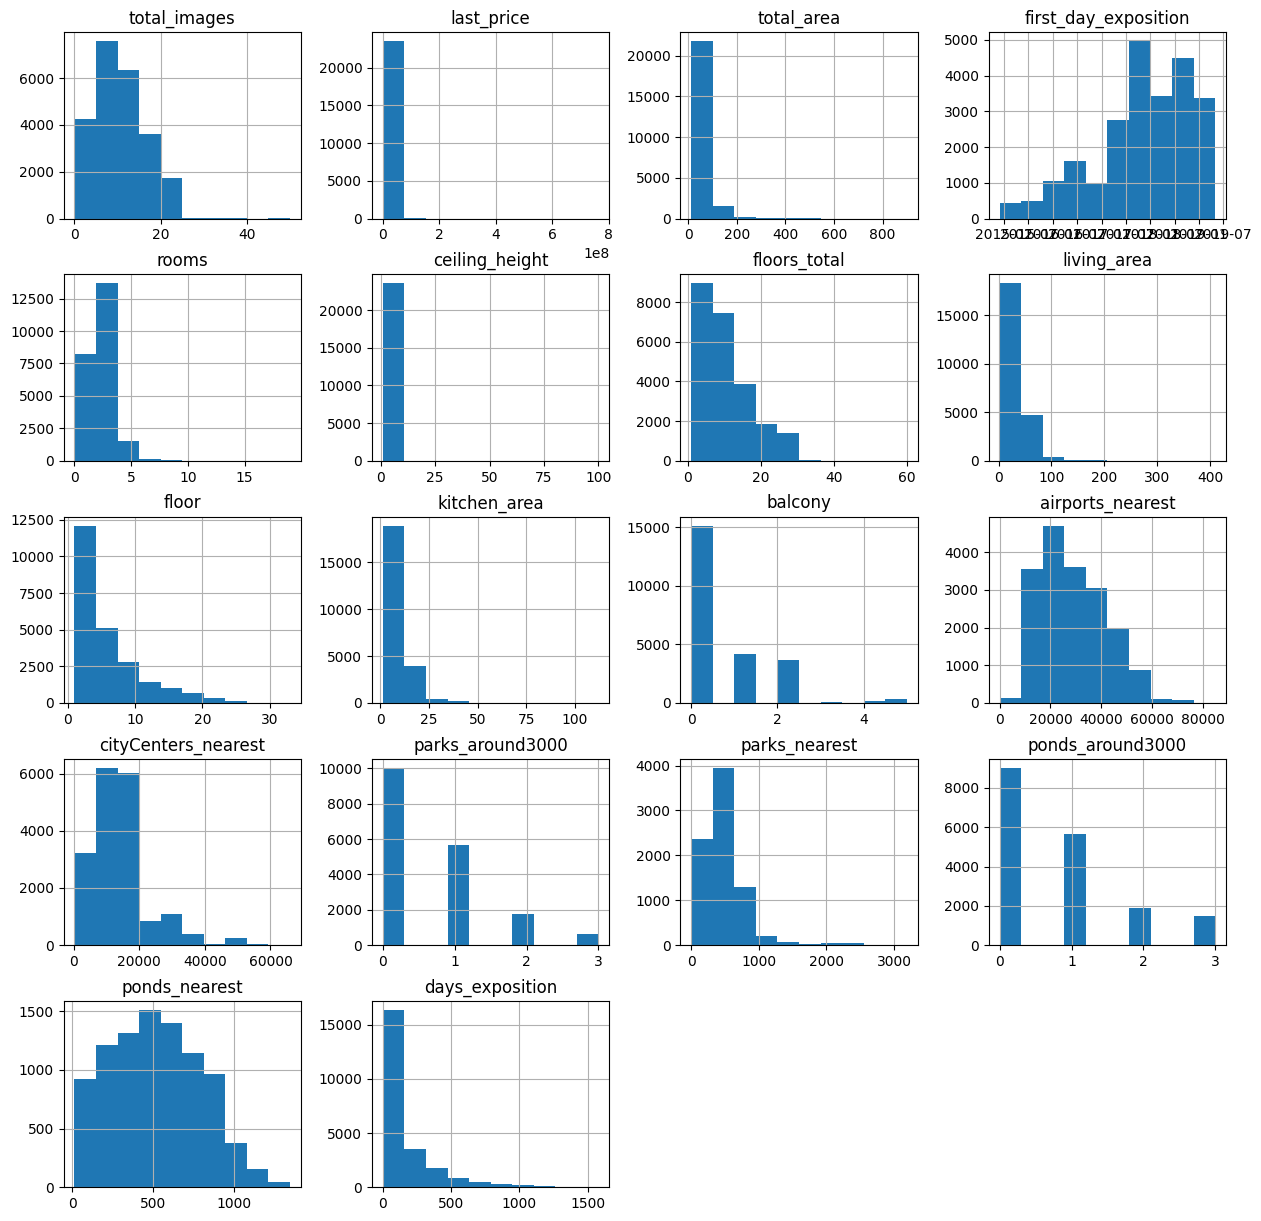

In [159]:
data.hist(figsize=(15,15),bins = 10);

Проверим данные на наличие дубликатов - явных и неявных.

In [160]:
data.duplicated().sum() #явных дубликатов нет

0

In [161]:
data = data.sort_values(by='locality_name') #отсортируем список названий

In [162]:
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [163]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок') #сделаем замены е на ё

In [164]:
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
#заменим все "городские поселки" на "поселки городского типа"

Данных много, чтобы проанализировать их проверим совпадения по последним словам, переберем все элементы списка с названиями и проверим на совпадения по последним словам. Затем проанализируем и можно выполнить замены.

In [165]:
dic_double={}
list_locality_name = data['locality_name'].unique()
for i in range(len(list_locality_name)):
    for j in range(i+1, len(list_locality_name)):
        if list_locality_name[i].split()[-1] == list_locality_name[j].split()[-1] and list_locality_name[i] not in dic_double:
            dic_double[list_locality_name[i]] = dic_double.get(list_locality_name[i],[])+[list_locality_name[j]]

for key, item in dic_double.items():
    print(key, item)


Кудрово ['деревня Кудрово']
Любань ['посёлок Любань']
Мурино ['посёлок Мурино']
Никольское ['село Никольское']
Новая Ладога ['село Старая Ладога']
Сосновый Бор ['деревня Бор']
посёлок городского типа Павлово ['село Павлово']
посёлок городского типа Фёдоровское ['деревня Фёдоровское']
деревня Бегуницы ['деревня Старые Бегуницы']
деревня Большие Колпаны ['деревня Малые Колпаны']
деревня Бор ['деревня Трубников Бор']
деревня Гарболово ['посёлок Гарболово']
деревня Зимитицы ['посёлок Зимитицы']
деревня Калитино ['посёлок Калитино']
деревня Малая Романовка ['посёлок Романовка']
деревня Рабитицы ['посёлок Рабитицы']
деревня Трубников Бор ['деревня Чудской Бор']
деревня Чудской Бор ['посёлок Пансионат Зелёный Бор']
деревня Щеглово ['посёлок Щеглово']
коттеджный посёлок Лесное ['посёлок Лесное']
посёлок Громово ['посёлок станции Громово']
посёлок Пансионат Зелёный Бор ['посёлок городского типа Красный Бор']
посёлок Рябово ['посёлок городского типа Рябово']
посёлок городского типа Дружная Горка

Будем считать, что такие записи как  "посёлок городского типа Приладожский" и "посёлок городского типа Приладожский", "деревня Щеглово" и "посёлок Щеглово" это дубликаты. Хотя по-хорошему, надо изучать карты. С учетом полученного словаря, выполним замены.

Заполняем "вручную", не самое удачное решение, но, это позволит избежать ошибочного слияния названий, там, где в данных имеются значительные совпадения у разных населенных пунктов. Например, 'деревня Малая Романовка' и 'посёлок Романовка' или 'деревня Большие Колпаны' и 'деревня Малые Колпаны', вероятно это разные населенные пункты.

In [166]:
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('посёлок Любань', 'Любань')
data['locality_name'] = data['locality_name'].str.replace('посёлок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].str.replace('деревня Гарболово', 'посёлок Гарболово')
data['locality_name'] = data['locality_name'].str.replace('деревня Зимитицы', 'посёлок Зимитицы')
data['locality_name'] = data['locality_name'].str.replace('деревня Калитино', 'посёлок Калитино')
data['locality_name'] = data['locality_name'].str.replace('деревня Рабитицы', 'посёлок Рабитицы')
data['locality_name'] = data['locality_name'].str.replace('деревня Фёдоровское', 'посёлок городского типа Фёдоровское')
data['locality_name'] = data['locality_name'].str.replace('деревня Щеглово', 'посёлок Щеглово')
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок Лесное', 'посёлок Лесное')
data['locality_name'] = data['locality_name'].str.replace('посёлок станции Громово', 'посёлок Громово')
data['locality_name'] = data['locality_name'].str.replace('посёлок Рябово', 'посёлок городского типа Рябово')
data['locality_name'] = data['locality_name'].str.replace('село Павлово', 'посёлок городского типа Павлово')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Приладожский', 'посёлок городского типа Приладожский')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Рахья', 'посёлок городского типа Рахья')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции Вещево', 'посёлок станции Вещево')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции Приветнинское', 'посёлок станции Приветнинское')


Можно было бы просто оставить названия населенных пунктов и удалить все типы. Мы рассматриваем только Ленинградскую область, поэтому достаточно маленькая вероятность, что встретятся населенные пункты с одинаковым названием но разными типами.

Изучим аномалии

In [167]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.102255,5.878124,10.423234,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,169.203692
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,21.189133,4.871485,5.631746,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,206.497729
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.410000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные по 'total_area' наводят на размышления. Максимальное значение - 900, при том что среднее составляет 60. Посмотрим, как это выглядит на графике.

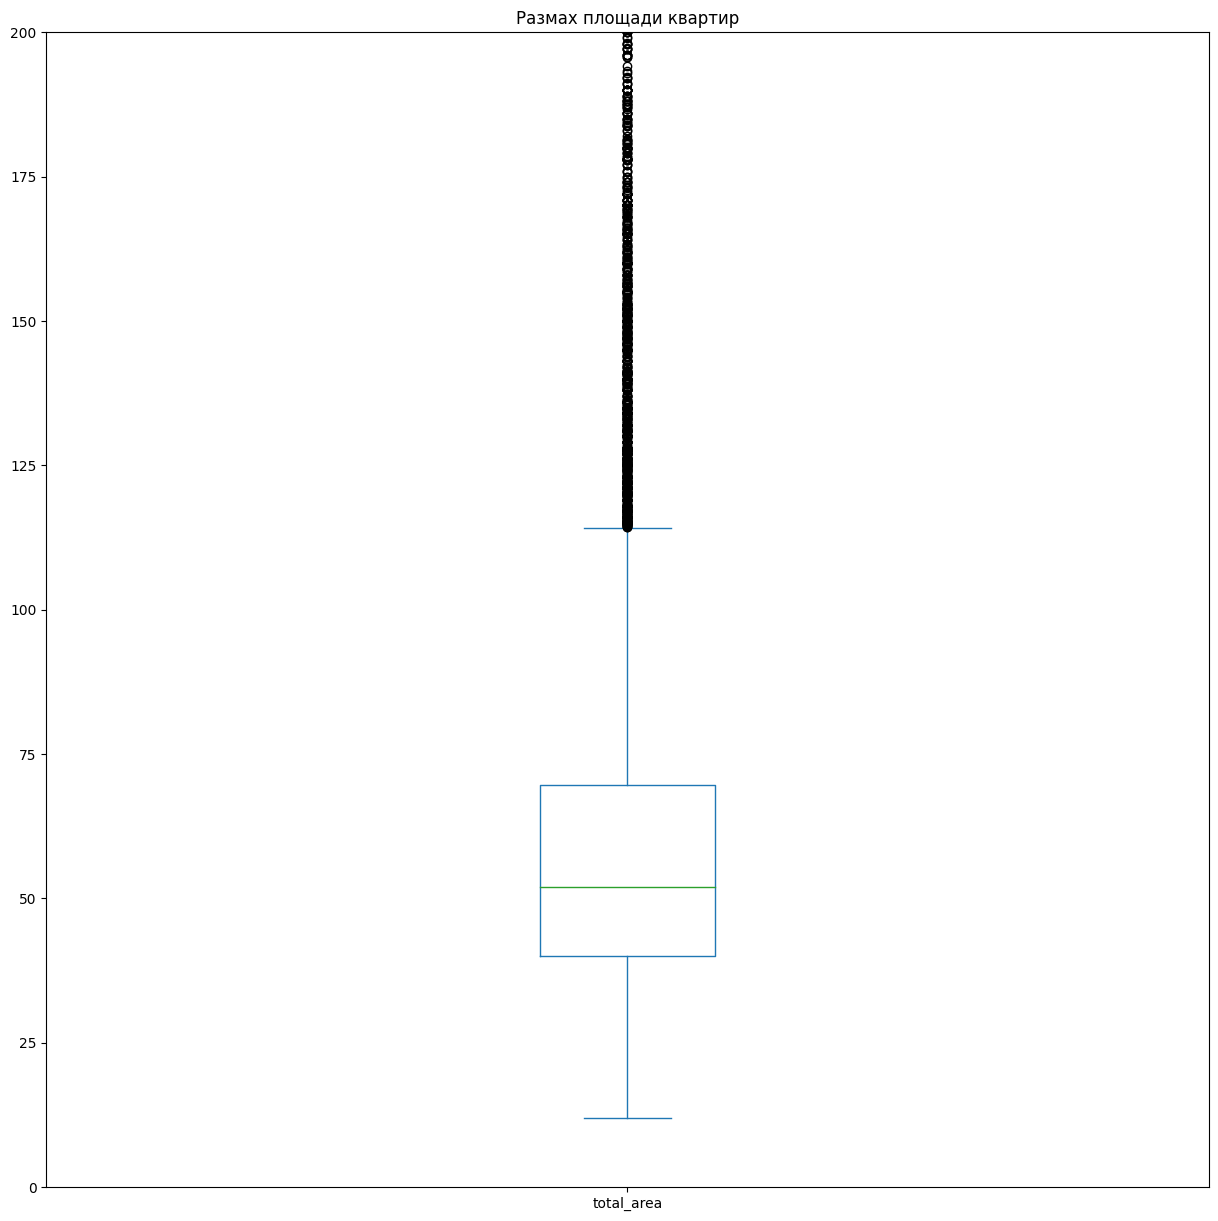

In [169]:
import matplotlib.pyplot as plt

plt.ylim(0, 200)

data['total_area'].plot(kind='box', title='Размах площади квартир', figsize=(15,15));


Видим выбросы выше 110. Это квартиры, общей площадью более 110 кв.м. Такие квартиры бывают, их меньше, их можно отнести к элитной недвижимости. Посчитаем, сколько таких квартир.

In [170]:
print('Всего квартир общей площадью от 12 до 20:',data.query('total_area > 12 and total_area < 20')['total_area'].count())
print('Всего квартир общей площадью от 110 до 200:',data.query('total_area > 110 and total_area < 200')['total_area'].count())
print('Всего квартир общей площадью от 200 до 300:',data.query('total_area > 200 and total_area < 300')['total_area'].count())
print('Всего квартир общей площадью от 300 до 500:',data.query('total_area > 300 and total_area < 500')['total_area'].count())
print('Всего квартир общей площадью более 500:',data.query('total_area > 500')['total_area'].count())

Всего квартир общей площадью от 12 до 20: 26
Всего квартир общей площадью от 110 до 200: 1134
Всего квартир общей площадью от 200 до 300: 163
Всего квартир общей площадью от 300 до 500: 52
Всего квартир общей площадью более 500: 7


Квартиры, площадью более 200 кв.м можно удалить. Их мало, на выборку не повлияют.

In [171]:
data.drop(index=data.query('total_area > 200').index,inplace=True)

Посмотрим на распределение общей площади квартир. Больше всего объявлений о продаже квартир площадью от 30 до 50, меньше 50-70. Объявлений о продаже  квартир площадью менее 75 уменьшается обратно пропорционально площади.

Т.о., самые распространенные объявления о продаже квартир площадью в диапазоне от 30 до 75 кв.м.

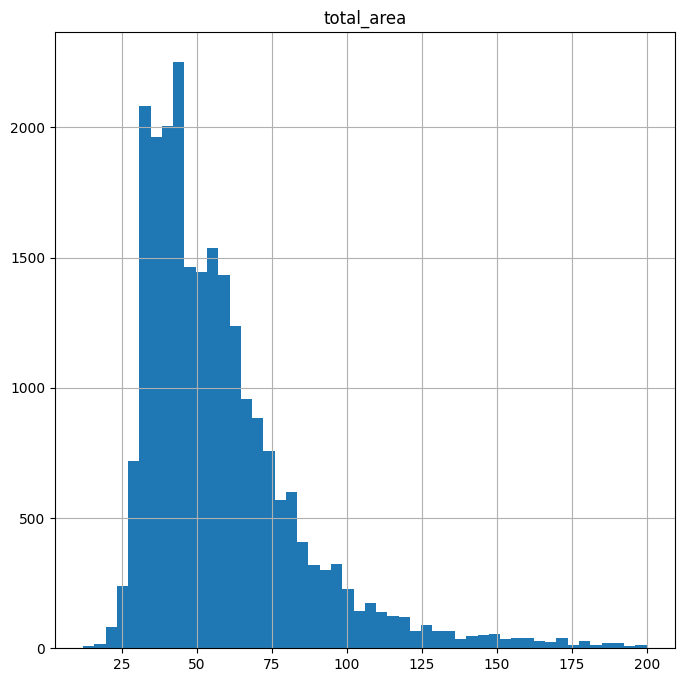

In [173]:
data.hist('total_area', bins=50, figsize=(8,8));

Посмотрим, что с данными по 'rooms'. Максимальное значение - 19, такое количество комнат возможно. Диаграмма размаха показывает, что комнат больше 12 нет. Посчитаем.

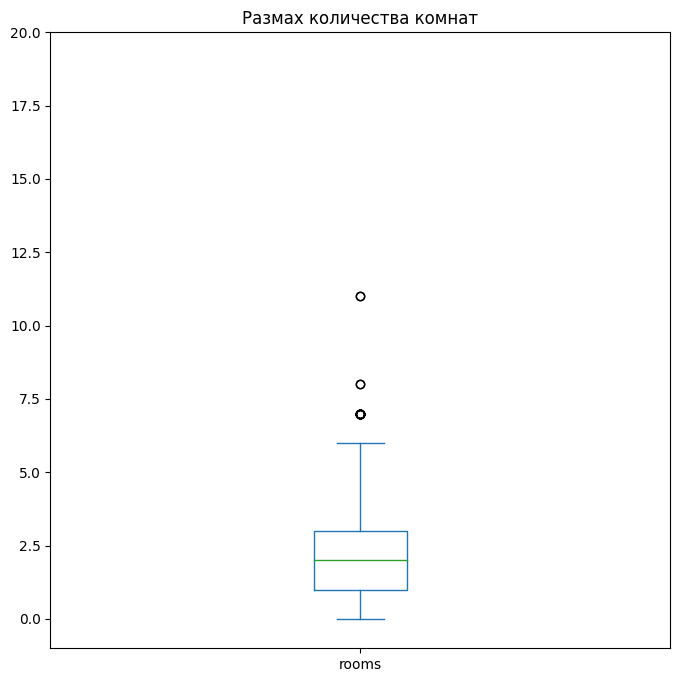

In [174]:
plt.ylim(-1, 20)

data['rooms'].plot(kind='box', title='Размах количества комнат', figsize=(8,8));

In [175]:
print('Количество квартир с комнатами больше 7:',data.query('rooms >7 ')['rooms'].count())
print('Количество квартир с 19 комнатами:',data.query('rooms ==19')['rooms'].count())
print('Количество квартир с 0 комнатами:',data.query('rooms ==0')['rooms'].count())

Количество квартир с комнатами больше 7: 4
Количество квартир с 19 комнатами: 0
Количество квартир с 0 комнатами: 193


Данные с количеством комнат больше 7 удалим. Квартир с количеством комнат 0 целых 193. Возможно это апартаменты или студии. Проверим это.

In [176]:
print('Квартиры без комнат (апартаменты, студия, открытый план):',\
      data.query('rooms == 0 and (is_apartment==True or studio == True or open_plan==True)')['rooms'].count())

Квартиры без комнат (апартаменты, студия, открытый план): 193


Действительно, 193 из 193 - это апартаменты, студия или открытый план, количество комнат в них определено как нулевое. Все сходится.

In [177]:
data.drop(index=data.query('rooms > 7').index,inplace=True)

Посмотрим на столбец с данными по высоте потолков, явно что-то не так.Отсортируем столбец, посмотрим какие встречаются данные.

Видим, что есть высота 100 м, это скорее всего ошибка. Есть также данные с высотой потолков от 25 до 32. Вероятно здесь пропущена запятая. Проведем расчеты.

In [178]:
data['ceiling_height'].describe()

count    23335.000000
mean         2.720301
std          0.993387
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

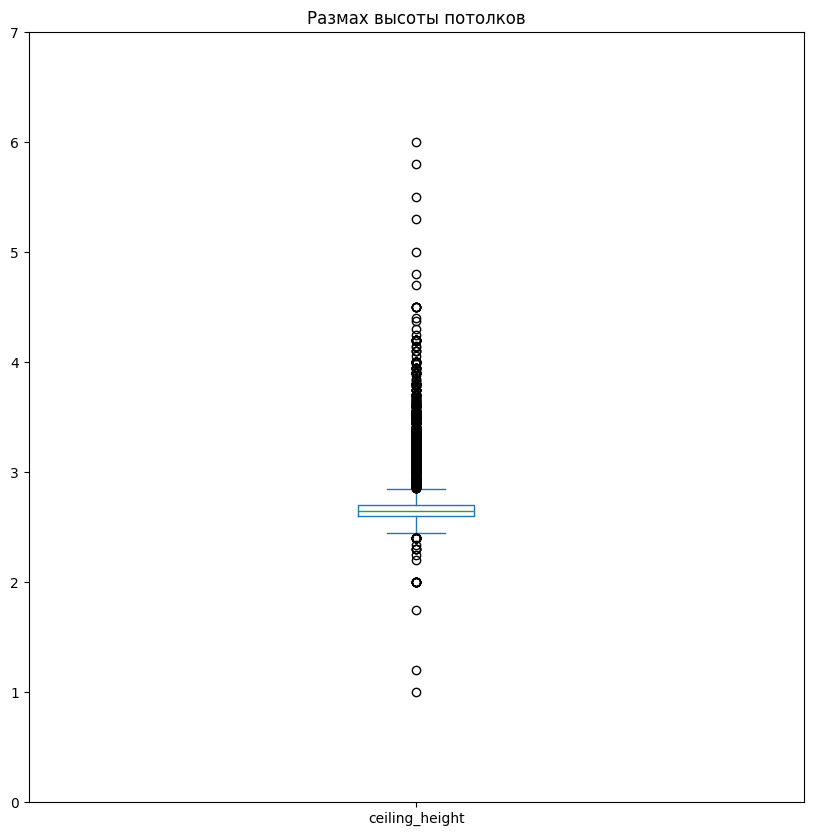

In [179]:
plt.ylim(0, 7)
data['ceiling_height'].plot(kind='box', title='Размах высоты потолков', figsize=(10,10));

In [180]:
print(sorted(data['ceiling_height'], reverse=True))

[100.0, 32.0, 32.0, 27.5, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 22.6, 20.0, 14.0, 10.3, 8.3, 8.0, 8.0, 8.0, 6.0, 5.8, 5.5, 5.3, 5.0, 4.8, 4.7, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.37, 4.3, 4.25, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.19, 4.19, 4.15, 4.14, 4.1, 4.1, 4.1, 4.06, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.98, 3.95, 3.95, 3.95, 3.95, 3.95, 3.95, 3.95, 3.93, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.88, 3.85, 3.84, 3.83, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.78, 3.78, 3.78, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.68, 3.67, 3.67, 3.67, 3.66, 3.66, 3.65, 3.65, 3.65, 3.65, 3.63, 3.63, 3.63, 

In [181]:
print('Количество квартир с высотой потолков менее 2.5 м. - ', data.query('ceiling_height<2.5')['ceiling_height'].count())
print('Количество квартир с высотой потолков от 4 м.до 24 м. - ', data.query('ceiling_height>4. and ceiling_height<24.')['ceiling_height'].count())
print('Количество квартир с высотой потолков больше 35 м. - ', data.query('ceiling_height>35.')['ceiling_height'].count())


Количество квартир с высотой потолков менее 2.5 м. -  73
Количество квартир с высотой потолков от 4 м.до 24 м. -  42
Количество квартир с высотой потолков больше 35 м. -  1


Это выбросы, удалим их. Высоту потолков от 25 до 35 разделим на 10 и сделаем замену в соответсвтующих записях.

In [182]:
data.drop(index=data.query('ceiling_height<2.5').index, inplace=True)
data.drop(index=data.query('ceiling_height>4. and ceiling_height<=24.').index, inplace=True)
data.drop(index=data.query('ceiling_height>35.').index, inplace=True)
data.update(data[(data['ceiling_height']>=25) & (data['ceiling_height']<36)]['ceiling_height']/10)


In [183]:
data['ceiling_height'].describe()

count    23218.000000
mean         2.690868
std          0.197521
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Теперь все нормально, высота потолков в пределах нормы.

In [184]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23218.000000,2.321800e+04,23218.000000,23218.000000,23218.000000,23218.000000,23218.000000,23218.000000,23218.000000,23218.000000,17737.000000,17757.000000,17758.000000,7828.000000,17758.000000,8828.000000,23218.000000
mean,9.857610,6.014638e+06,58.122155,2.032862,2.690868,10.735249,32.959803,5.895081,10.259288,0.595099,28836.869595,14295.805204,0.601870,491.630174,0.761572,520.590507,168.267939
std,5.664765,6.200090e+06,26.448748,0.990716,0.197521,6.605757,16.631027,4.885291,5.117654,0.960532,12687.099069,8595.250410,0.793169,343.040479,0.933761,277.948129,205.349116
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18495.000000,9442.000000,0.000000,288.000000,0.000000,296.750000,45.000000
50%,9.000000,4.600000e+06,51.700000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26876.000000,13164.000000,0.000000,455.000000,0.000000,505.000000,95.000000
75%,14.000000,6.693750e+06,68.780000,3.000000,2.700000,16.000000,40.900000,8.000000,11.300000,1.000000,37368.000000,16317.000000,1.000000,613.000000,1.000000,733.000000,197.000000
max,50.000000,3.300000e+08,200.000000,7.000000,4.000000,60.000000,164.700000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проверим, есть ли квартиры, где общая площадь меньше чем суммарная площадь кухни и гостинной. Если такие данные есть - это аномалии, их следует удалить.

In [185]:
data['total_kitchen_living'] = data['living_area'] + data['kitchen_area']

In [186]:
data.query('total_kitchen_living > total_area')['total_area'].count()

719

Таких записей - 719. Скорее всего это ошибки. Удалим эти данные.

In [187]:
data.drop(index=data.query('total_kitchen_living > total_area').index, inplace=True)

In [188]:
data.query('total_kitchen_living > total_area')['total_area'].count()

0

In [189]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_kitchen_living
count,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,17304.000000,17324.000000,17325.000000,7684.000000,17325.000000,8598.000000,22499.000000,22499.000000
mean,9.928397,6.101375e+06,58.945903,2.068047,2.691473,10.628117,33.132085,5.838571,10.275676,0.599138,28884.081773,14309.123874,0.605310,491.612572,0.762309,520.577576,170.020356,43.407762
std,5.666690,6.268603e+06,26.393268,0.980765,0.199072,6.542752,16.785882,4.830138,5.163290,0.964376,12687.777857,8649.663409,0.793689,342.399373,0.936052,277.449818,206.460381,19.031516
min,0.000000,1.219000e+04,14.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,11.000000
25%,6.000000,3.499000e+06,41.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.200000,0.000000,18539.000000,9415.750000,0.000000,288.000000,0.000000,297.000000,47.000000,29.500000
50%,10.000000,4.690000e+06,52.500000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26894.000000,13149.000000,0.000000,455.000000,0.000000,505.000000,95.000000,39.100000
75%,14.000000,6.750000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.410000,1.000000,37407.000000,16316.000000,1.000000,613.000000,1.000000,733.000000,199.000000,51.000000
max,50.000000,3.300000e+08,200.000000,7.000000,4.000000,60.000000,164.700000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,185.000000


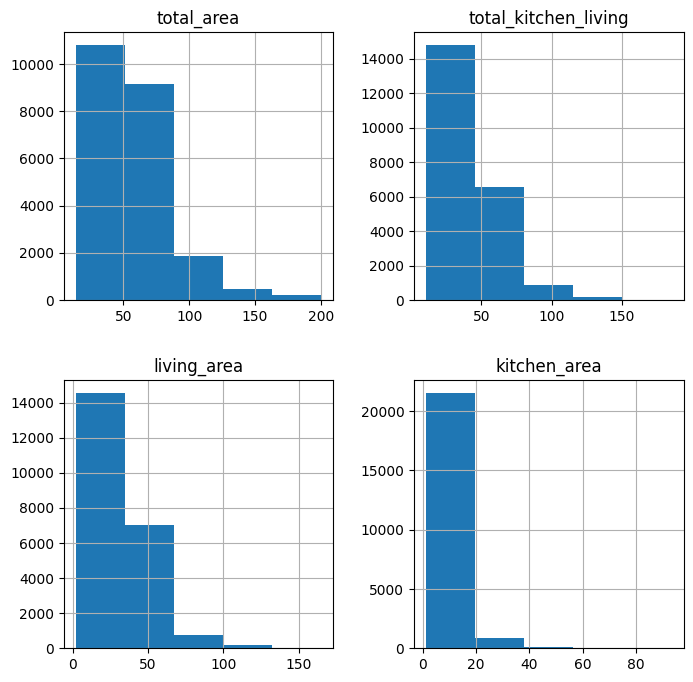

In [190]:
new_data = data[['total_area','total_kitchen_living','living_area','kitchen_area']].copy()
new_data.hist(bins=5, figsize=(8,8));

Посмотрим на распределение количества балконов

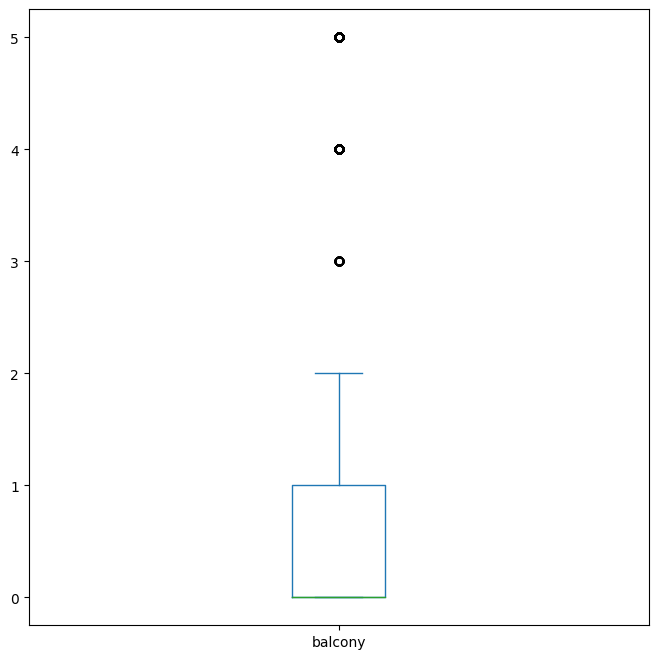

In [191]:
data['balcony'].plot(kind='box',figsize=(8,8));

In [192]:
print("3 балкона - ",data.query('balcony==3')['balcony'].count())
print("4 балконов - ",data.query('balcony==4')['balcony'].count())
print("Больше 4 балконов - ",data.query('balcony>4')['balcony'].count())
print(" 5 балконов - ",data.query('balcony==5')['balcony'].count())

3 балкона -  74
4 балконов -  179
Больше 4 балконов -  295
 5 балконов -  295


Учитывая, что мы удалили объявления о квартирах, площадью больше 200 кв.м., то маловероятно наличие в них более 4 балконов. Диаграмма размаха показывает, что больше 3 балконов - это уже выбросы. Можно проверить количество квартир с площадью от 100 до 200 и количество балконов.

In [193]:
print('Квартиры большой площадью и балконами больше 4:',data.query('balcony > 4 and total_area>100')['total_area'].count())
print('Квартиры большой площадью и 3 балконами:',data.query('balcony == 3 and total_area>100')['total_area'].count())
print('Квартиры большой площадью и балконами от 3 до 5:',data.query('balcony >= 3 and balcony <= 5 and total_area>100')['total_area'].count())

Квартиры большой площадью и балконами больше 4: 46
Квартиры большой площадью и 3 балконами: 16
Квартиры большой площадью и балконами от 3 до 5: 97


Удалим данные с балконами 3 и больше. Явно, это какие-то ошибочные данные.

In [194]:
data.drop(index=data.query('balcony >= 3').index, inplace=True)

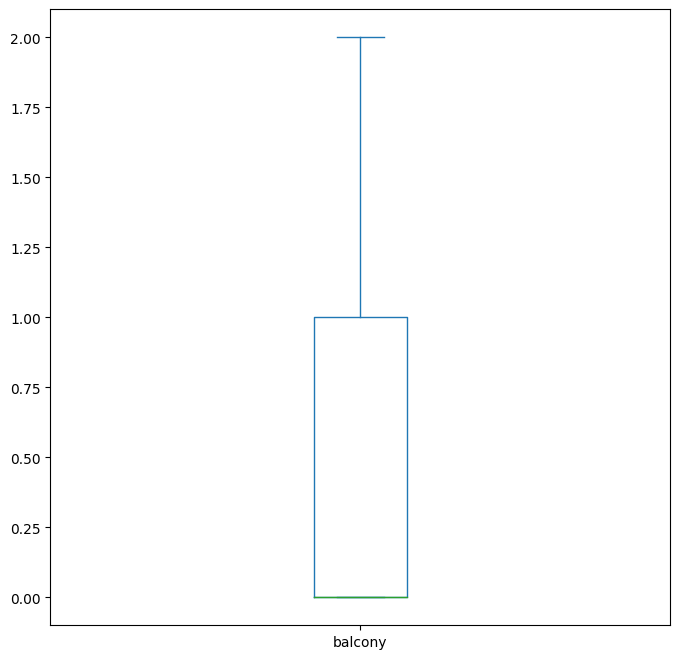

In [195]:
data['balcony'].plot(kind='box',figsize=(8,8));

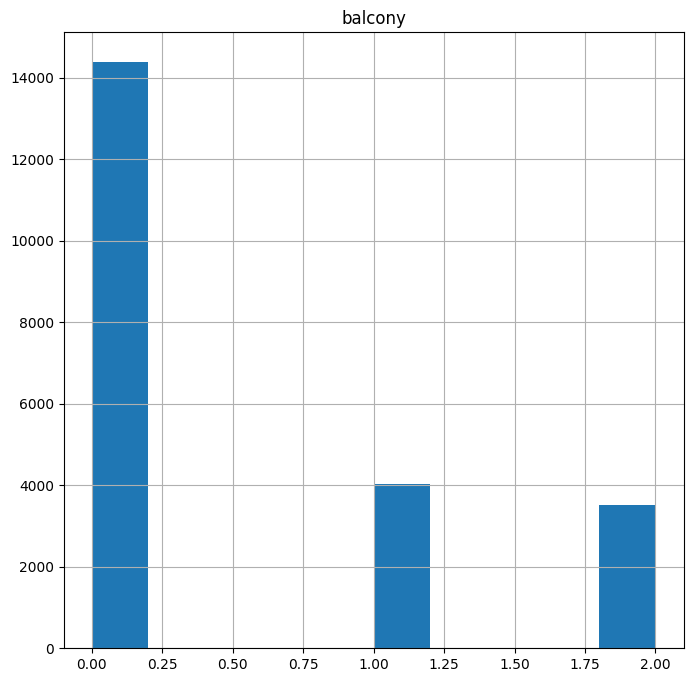

In [197]:
data.hist('balcony',figsize=(8,8));

In [198]:
data['days_exposition'].describe()

count    21951.000000
mean       170.045693
std        206.691396
min          1.000000
25%         46.000000
50%         95.000000
75%        199.000000
max       1572.000000
Name: days_exposition, dtype: float64

Среднее значение меньше чем стандартное отклонение. Что-то не так.

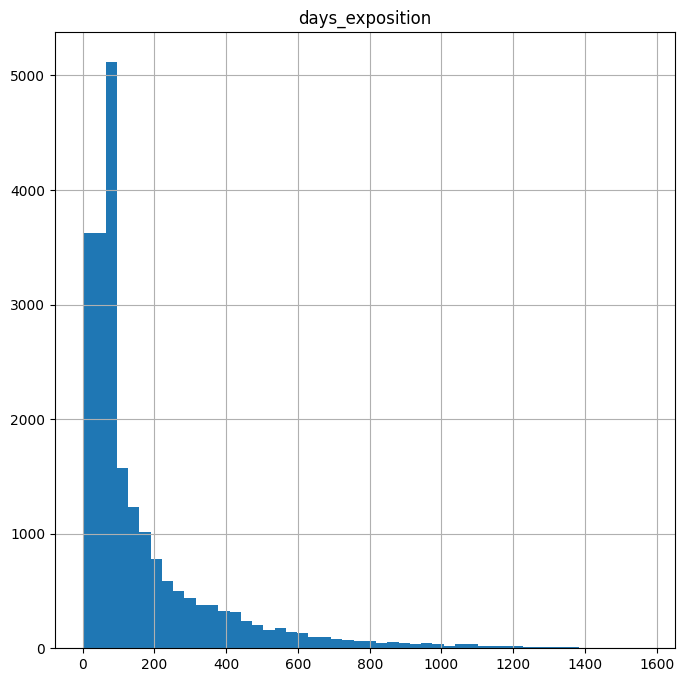

In [199]:
data.hist('days_exposition',bins=50, figsize=(8,8));

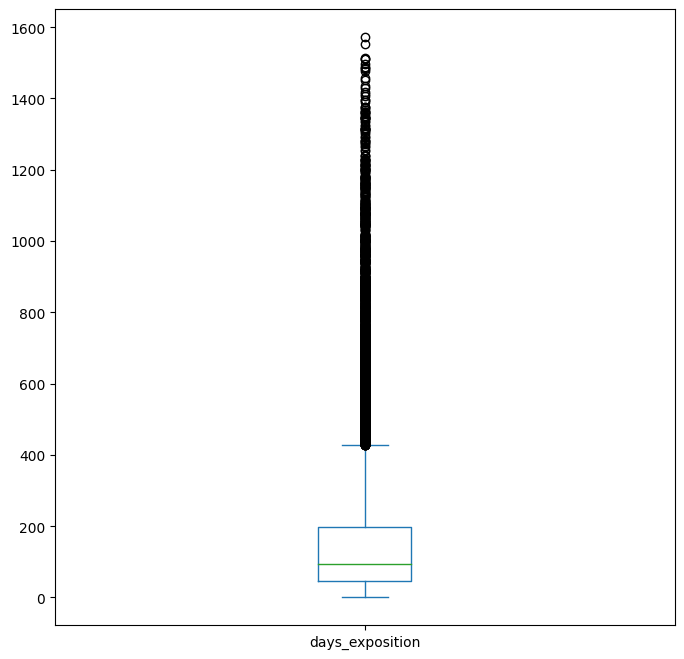

In [200]:
data['days_exposition'].plot(kind="box",figsize=(8,8));

Есть объявления, которые висели больше года, они попадают в нормальное распределение. Посчитаем количество объявлений, которые висели больше 450 дней.

In [201]:
print("Количество объявлений висело больше года - ",data.query('days_exposition>450')['days_exposition'].count())

Количество объявлений висело больше года -  1958


Возможно их не стоит удалять, а следует оценить такие квартиры, возможно анализ выявит, почему они не продавались.

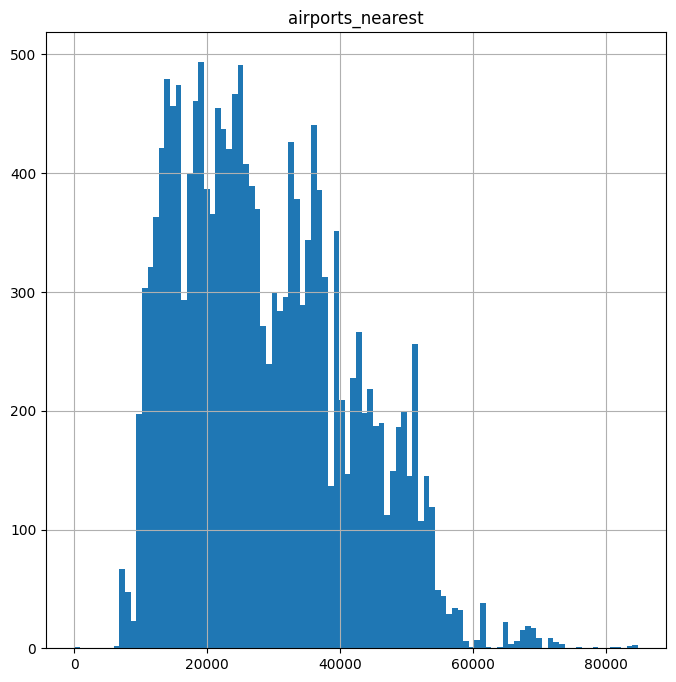

In [202]:
data.hist('airports_nearest', bins=100, figsize=(8, 8));

Есть какой-то выброс. Большинство квартир находится от аэропорта на расстоянии не менее 10 км.

In [203]:
data.query('airports_nearest<5000')['airports_nearest'].count()

1

Есть одна такая квартира, удалим ее.

In [204]:
data.drop(index=data.query('airports_nearest<10000').index, inplace=True)
data.reset_index(drop=True,inplace=True)

In [205]:
data.query('airports_nearest<10000')['airports_nearest'].count()

0

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21678 entries, 0 to 21677
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21678 non-null  int64         
 1   last_price            21678 non-null  float64       
 2   total_area            21678 non-null  float64       
 3   first_day_exposition  21678 non-null  datetime64[ns]
 4   rooms                 21678 non-null  int64         
 5   ceiling_height        21678 non-null  float64       
 6   floors_total          21678 non-null  int64         
 7   living_area           21678 non-null  float64       
 8   floor                 21678 non-null  int64         
 9   is_apartment          21678 non-null  bool          
 10  studio                21678 non-null  bool          
 11  open_plan             21678 non-null  bool          
 12  kitchen_area          21678 non-null  float64       
 13  balcony         

In [207]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_kitchen_living
0,10,1310000.0,65.6,2019-02-22,3,2.65,5,42.0,4,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,95,49.5
1,6,980000.0,47.1,2019-04-12,2,2.65,3,29.0,3,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,95,38.0
2,4,950000.0,44.0,2018-05-05,2,2.65,5,30.0,2,True,...,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156,36.0
3,6,850000.0,48.0,2016-03-11,2,2.65,5,30.0,5,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,174,39.1
4,7,820000.0,51.0,2017-12-09,2,2.65,5,32.0,5,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,130,40.5
5,7,660000.0,43.0,2018-10-23,2,2.65,3,29.0,3,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,20,35.0
6,9,650000.0,41.0,2017-10-13,2,2.65,3,28.0,1,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,14,34.0
7,0,720000.0,44.0,2018-09-09,2,2.65,3,30.0,2,False,...,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,7,39.1
8,11,999000.0,62.0,2018-02-15,4,2.65,5,46.0,2,True,...,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,226,53.0
9,12,1500000.0,78.0,2017-09-07,3,2.80,4,30.0,3,False,...,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45,39.1


In [208]:
data['last_price'].describe()

count    2.167800e+04
mean     6.033710e+06
std      6.273449e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.698750e+06
max      3.300000e+08
Name: last_price, dtype: float64

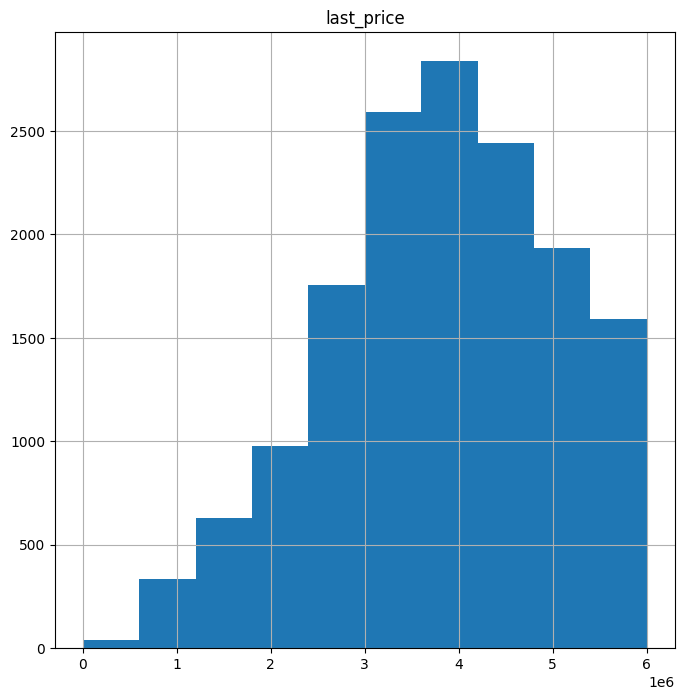

In [209]:
data.hist('last_price', bins=10, figsize=(8, 8), range=(1000, 6e+6));

### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [210]:
#Цена одного квадратного метра
data['cost_one_metre'] = data['last_price']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_kitchen_living,cost_one_metre
0,10,1310000.0,65.6,2019-02-22,3,2.65,5,42.0,4,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,95,49.5,19969.512195
1,6,980000.0,47.1,2019-04-12,2,2.65,3,29.0,3,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,95,38.0,20806.794055
2,4,950000.0,44.0,2018-05-05,2,2.65,5,30.0,2,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156,36.0,21590.909091
3,6,850000.0,48.0,2016-03-11,2,2.65,5,30.0,5,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,174,39.1,17708.333333
4,7,820000.0,51.0,2017-12-09,2,2.65,5,32.0,5,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,130,40.5,16078.431373
5,7,660000.0,43.0,2018-10-23,2,2.65,3,29.0,3,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,20,35.0,15348.837209
6,9,650000.0,41.0,2017-10-13,2,2.65,3,28.0,1,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,14,34.0,15853.658537
7,0,720000.0,44.0,2018-09-09,2,2.65,3,30.0,2,False,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,7,39.1,16363.636364
8,11,999000.0,62.0,2018-02-15,4,2.65,5,46.0,2,True,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,226,53.0,16112.903226
9,12,1500000.0,78.0,2017-09-07,3,2.80,4,30.0,3,False,...,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45,39.1,19230.769231


**День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [211]:
data['days_publication'] = data['first_day_exposition'].dt.weekday

**Месяц публикации объявления**

In [212]:
data['month_publication'] = data['first_day_exposition'].dt.month

**год публикации объявления**

In [213]:
data['year_publication'] = data['first_day_exposition'].dt.year

**Тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

In [214]:
data['type_floor'] = data.apply(lambda x: 'первый' if x.floor == 1
                                else ('последний' if x.floor==x.floors_total
                               else 'другой'), axis = 1)

In [215]:
data['type_floor'].value_counts()

другой       15879
последний     3053
первый        2746
Name: type_floor, dtype: int64

**Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

Ввиду того, что пропущеные данные остались, вычисляем расстояние до центра с учетом возможных исключений.

In [216]:
try:
    data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
    data['cityCenters_nearest_km'] =  data['cityCenters_nearest_km'].astype('float32')
except:
    data['cityCenters_nearest_km'] = NaN
    data['cityCenters_nearest_km'] =  data['cityCenters_nearest_km'].astype('float32')

In [217]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_kitchen_living,cost_one_metre,days_publication,month_publication,year_publication,type_floor,cityCenters_nearest_km
0,10,1310000.0,65.6,2019-02-22,3,2.65,5,42.0,4,True,...,NaN,NaN,95,49.5,19969.512195,4,2,2019,другой,NaN
1,6,980000.0,47.1,2019-04-12,2,2.65,3,29.0,3,True,...,NaN,NaN,95,38.0,20806.794055,4,4,2019,последний,NaN
2,4,950000.0,44.0,2018-05-05,2,2.65,5,30.0,2,True,...,NaN,NaN,156,36.0,21590.909091,5,5,2018,другой,NaN
3,6,850000.0,48.0,2016-03-11,2,2.65,5,30.0,5,True,...,NaN,NaN,174,39.1,17708.333333,4,3,2016,последний,NaN
4,7,820000.0,51.0,2017-12-09,2,2.65,5,32.0,5,True,...,NaN,NaN,130,40.5,16078.431373,5,12,2017,последний,NaN
5,7,660000.0,43.0,2018-10-23,2,2.65,3,29.0,3,True,...,NaN,NaN,20,35.0,15348.837209,1,10,2018,последний,NaN
6,9,650000.0,41.0,2017-10-13,2,2.65,3,28.0,1,True,...,NaN,NaN,14,34.0,15853.658537,4,10,2017,первый,NaN
7,0,720000.0,44.0,2018-09-09,2,2.65,3,30.0,2,False,...,NaN,NaN,7,39.1,16363.636364,6,9,2018,другой,NaN
8,11,999000.0,62.0,2018-02-15,4,2.65,5,46.0,2,True,...,NaN,NaN,226,53.0,16112.903226,3,2,2018,другой,NaN
9,12,1500000.0,78.0,2017-09-07,3,2.80,4,30.0,3,False,...,NaN,NaN,45,39.1,19230.769231,3,9,2017,другой,NaN


### Проведите исследовательский анализ данных

**Анализ параметров объектов**

In [218]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_kitchen_living,cost_one_metre,days_publication,month_publication,year_publication,cityCenters_nearest_km
count,21678.000000,2.167800e+04,21678.000000,21678.000000,21678.000000,21678.000000,21678.00000,21678.000000,21678.000000,21678.000000,...,7287.000000,16616.000000,8325.000000,21678.000000,21678.000000,2.167800e+04,21678.000000,21678.000000,21678.000000,16615.000000
mean,9.897823,6.033710e+06,58.531667,2.055679,2.691206,10.523342,32.92370,5.767322,10.223781,0.503967,...,486.467957,0.771365,519.611892,170.135391,43.147481,9.779107e+04,2.559600,6.410924,2017.367008,14.300571
std,5.643622,6.273449e+06,26.211213,0.980687,0.200203,6.499476,16.75474,4.775025,5.113969,0.754961,...,342.016552,0.939212,276.300084,206.807349,18.966858,4.504135e+04,1.784906,3.482891,1.039384,8.735258
min,0.000000,1.219000e+04,17.000000,0.000000,2.500000,1.000000,2.00000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,11.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.450000e+06,40.800000,1.000000,2.600000,5.000000,19.00000,2.000000,7.100000,0.000000,...,286.000000,0.000000,297.000000,46.000000,29.400000,7.600000e+04,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.00000,4.000000,9.100000,0.000000,...,447.000000,1.000000,504.000000,95.000000,39.100000,9.426230e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.698750e+06,69.000000,3.000000,2.700000,15.000000,41.00000,8.000000,11.300000,1.000000,...,608.000000,1.000000,729.000000,199.000000,50.600000,1.130790e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,200.000000,7.000000,4.000000,60.000000,164.70000,33.000000,93.200000,2.000000,...,3190.000000,3.000000,1344.000000,1572.000000,185.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


In [219]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_kitchen_living,cost_one_metre,days_publication,month_publication,year_publication,type_floor,cityCenters_nearest_km
0,10,1310000.0,65.6,2019-02-22,3,2.65,5,42.0,4,True,...,NaN,NaN,95,49.5,19969.512195,4,2,2019,другой,NaN
1,6,980000.0,47.1,2019-04-12,2,2.65,3,29.0,3,True,...,NaN,NaN,95,38.0,20806.794055,4,4,2019,последний,NaN
2,4,950000.0,44.0,2018-05-05,2,2.65,5,30.0,2,True,...,NaN,NaN,156,36.0,21590.909091,5,5,2018,другой,NaN
3,6,850000.0,48.0,2016-03-11,2,2.65,5,30.0,5,True,...,NaN,NaN,174,39.1,17708.333333,4,3,2016,последний,NaN
4,7,820000.0,51.0,2017-12-09,2,2.65,5,32.0,5,True,...,NaN,NaN,130,40.5,16078.431373,5,12,2017,последний,NaN


Построим гистограммы, по разным показателям

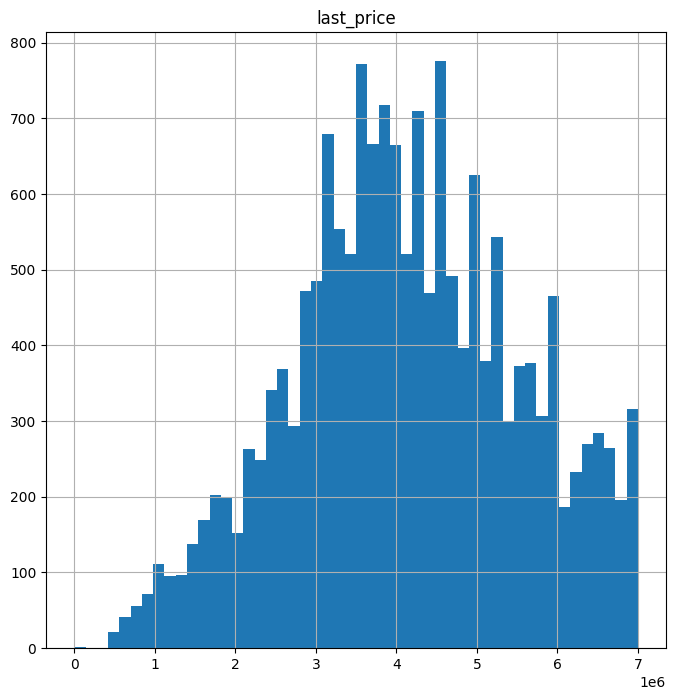

In [220]:
data.hist('last_price', bins=50, range=(0,7e+06), figsize=(8,8));

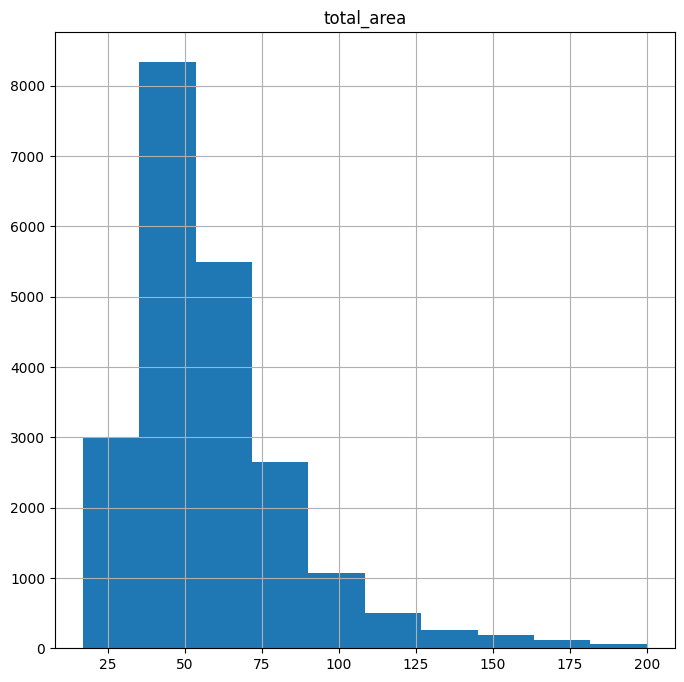

In [221]:
data.hist('total_area', bins=10,figsize=(8,8));


Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м.

Больше всего выставлено квартир на продажу площадью от 35 до приблизительно 53 кв.м. Учитывая, что больше всего обявлений 1-2х комнадных квартир, то да это вполне подходящие площади. На треть меньше объявлений о продаже квартир площадью от 53 до 75 кв.м.
Приблизительно в равных количествах объявлений о продаже квартир до 30 кв.м и от 75 до примерно 85 кв.м.
Квартир, площадью больше 100 кв. м - выставлено на продажу относительно немного - около 10%.

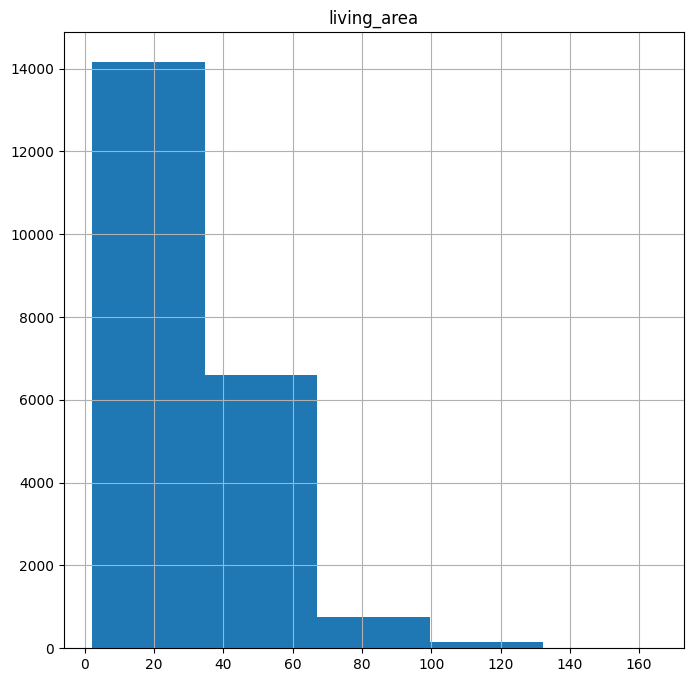

In [222]:
data.hist('living_area', bins=5,figsize=(8,8));

Чаще всего площадь гостинной около 20 кв.м., реже от 40 до 60.

Учитывая анализ предыдущей гистограммы, вполне оправдано, что площадь гостинной в основном - около 20 кв.м.

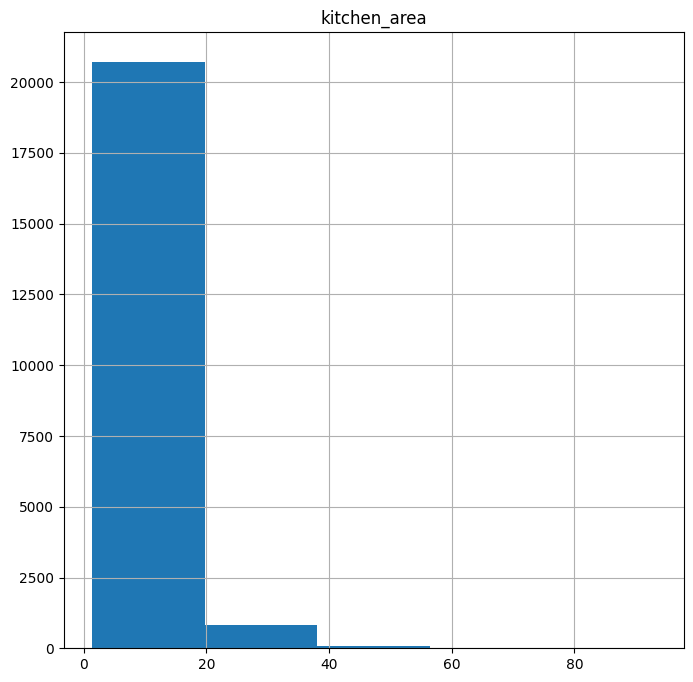

In [223]:
data.hist('kitchen_area', bins=5,figsize=(8,8));

В большинстве случаев кухни имеют площадь до 20 кв.м. Больше - реже. Этот вывод подтверждает выоды, сделанные из анализа предыдущих гистограмм. Плащадь кухни соотносится с  площадью гостинной и общей площадью продаваемых квартир.

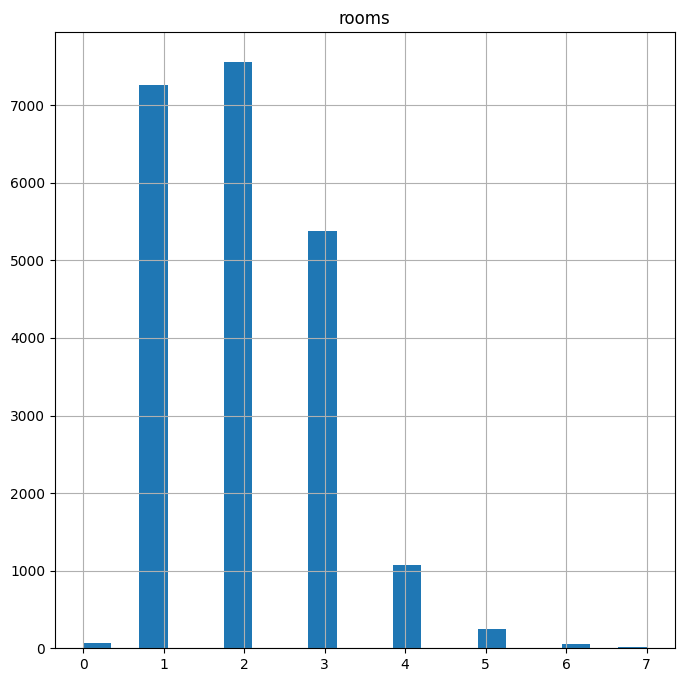

In [224]:
data.hist('rooms', bins=20, figsize=(8, 8));

Больше всего продаются квартиры с 1-2 комнатные, чуть меньше 3-х комнатные. Есть объявления о продаже квартир, имеющих более 3-х комнат, но их значительно меньше.

Вот и ответ, почему площадь продаваемых квартир лежит в диапазоне от 35 до 50 кв.м. Это типовые 1-2х комнадные квартиры.

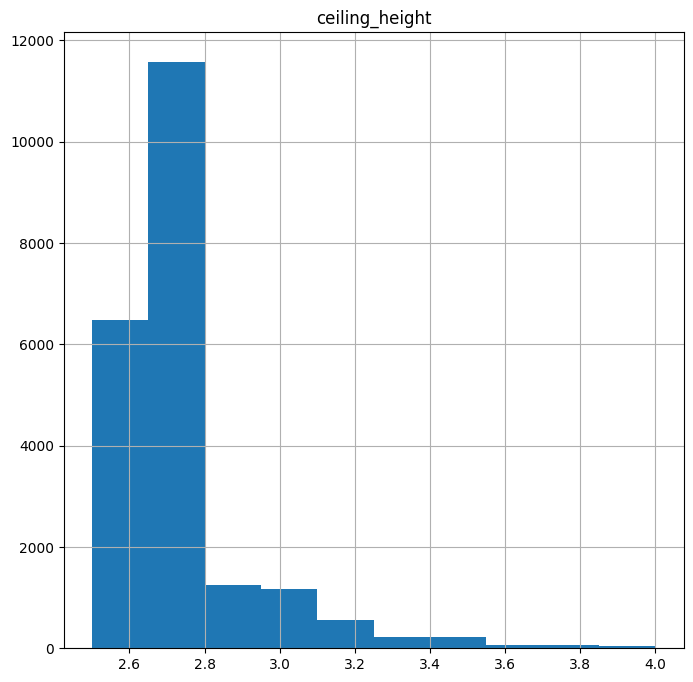

In [225]:
data.hist('ceiling_height', bins=10,figsize=(8, 8));

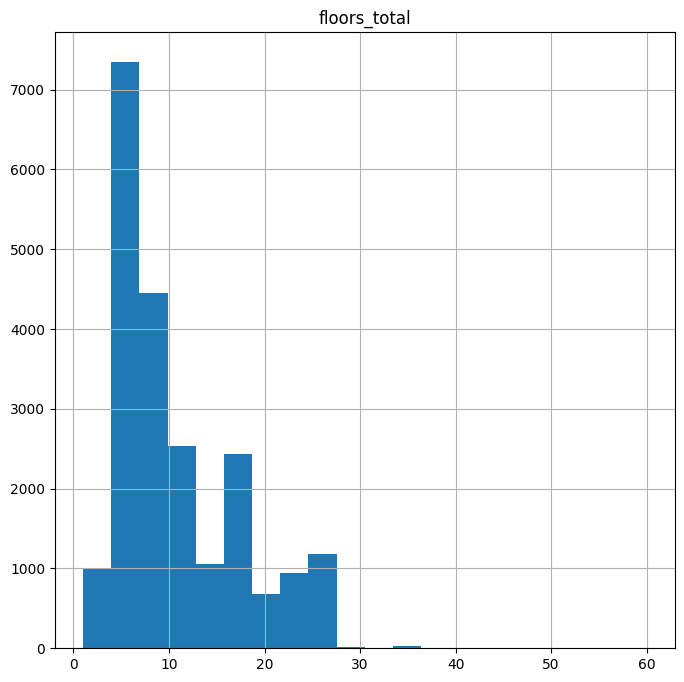

In [226]:
data.hist('floors_total', bins=20, figsize=(8, 8));

Самые частые объявления о продаже недвижмости, размещенной в домах, имеющих не более 5 этажей. В половину меньше - до 10 этажей.

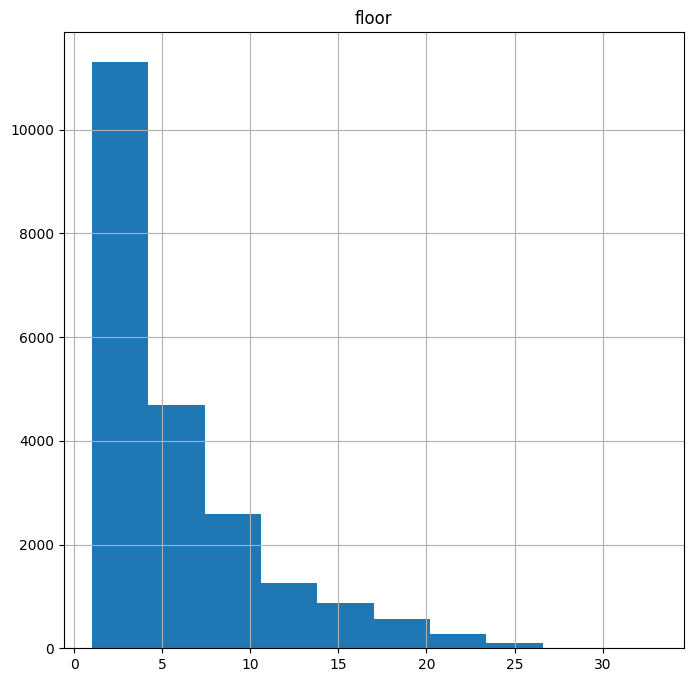

In [227]:
data.hist('floor', bins=10,figsize=(8, 8));

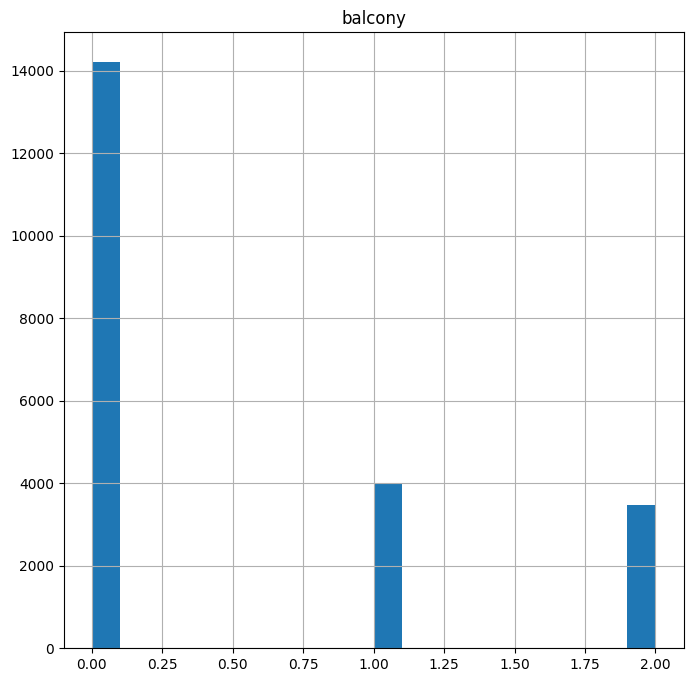

In [228]:
data.hist('balcony', bins=20,figsize=(8, 8));

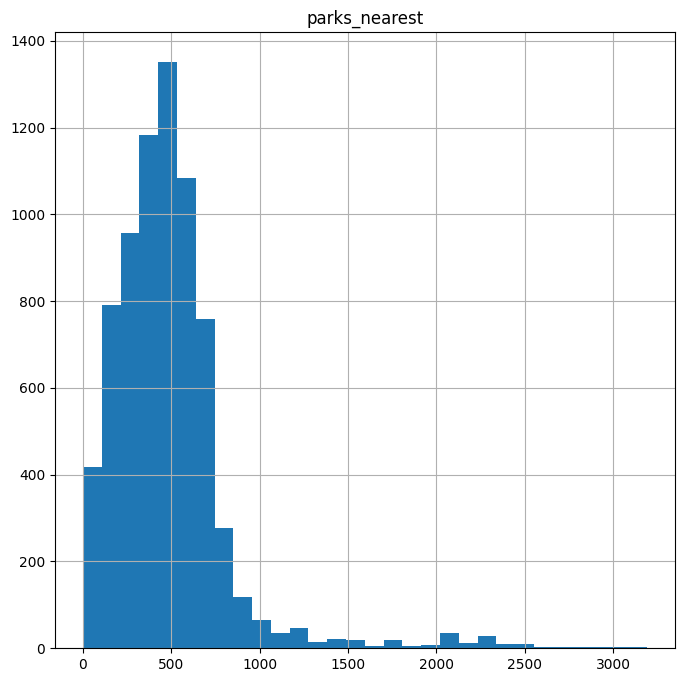

In [229]:
data.hist('parks_nearest', bins=30, figsize=(8, 8));

#Судя по графикам больше всего квартир с водоемами и парками на расстоянии до 1 км.

Парки расположены от продаваемых квартир как в непосредственной близости, так и на значительном расстоянии. В большинстве случаев удаленность от парка в районе 500 м - что достаточно близко.

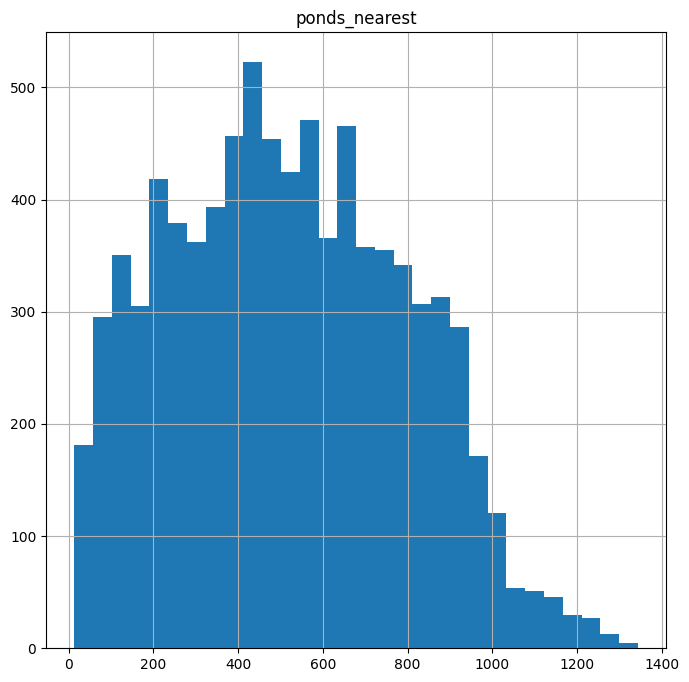

In [230]:
data.hist('ponds_nearest', bins=30, figsize=(8, 8));

Также как и парки, водоемы расположены от продаваемых квартир как в непосредственной близости, так и на значительном расстоянии. В большинстве случаев удаленность от водоема в районе 500 м. Большинство парков имеют водоемы.

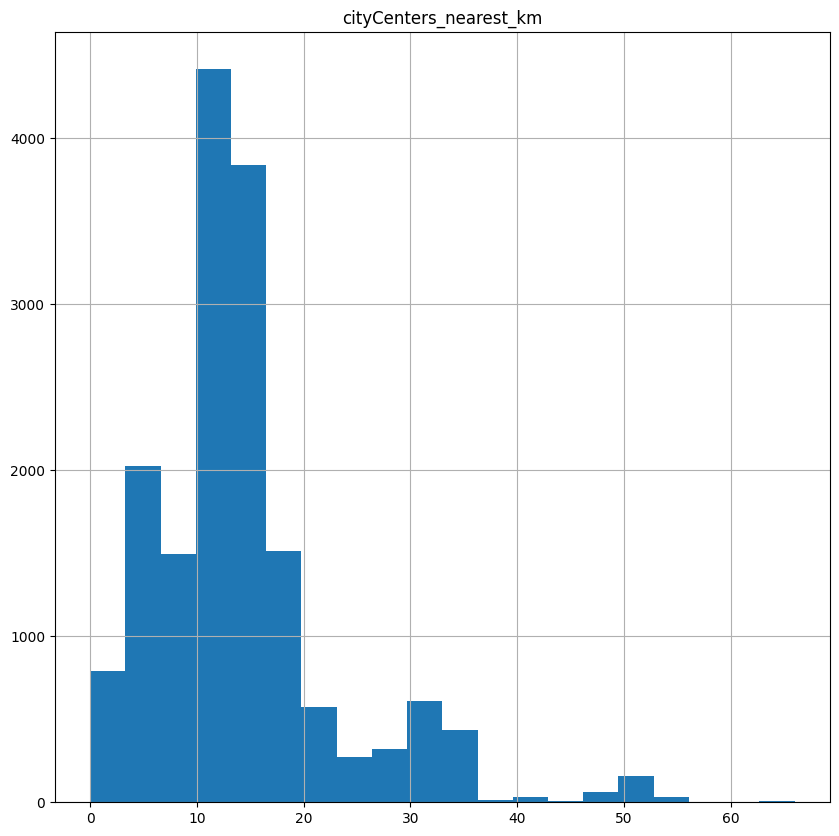

In [231]:
data.hist('cityCenters_nearest_km', bins=20, figsize=(10,10));

Больше всего объявлений о продаже квартир, расположенных на расстоянии от 10 до 15 км от центра. Чуть меньше объявлений - 15-17 км.
И дальше на уменьшение  - в 5 км, еще меньше 7км и 20-23км, 30.

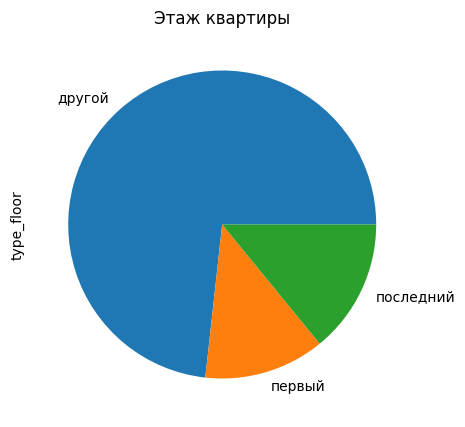

In [232]:
data.groupby('type_floor')['type_floor'].count().plot.pie(y = 'type_floor', figsize=(5, 5), title = "Этаж квартиры");

Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей одинакого мало.

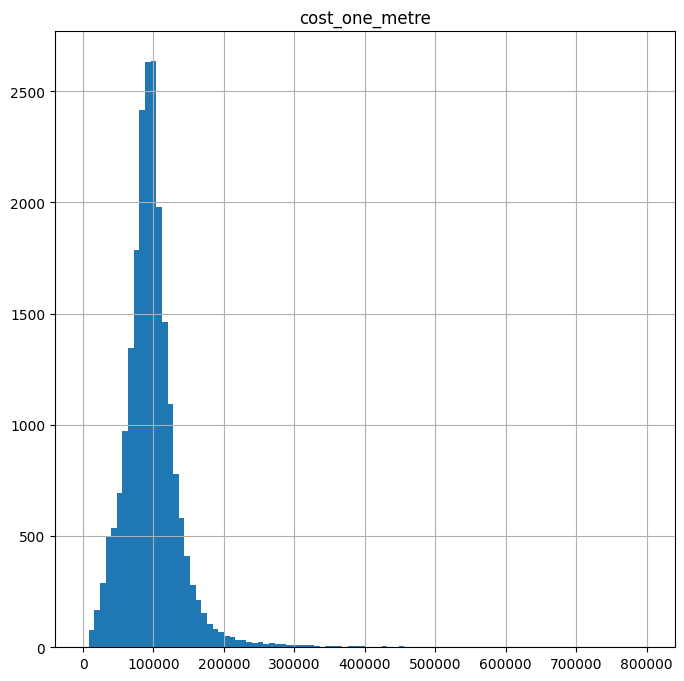

In [233]:
data.hist('cost_one_metre', bins=100, figsize=(8, 8), range=(0,800000));

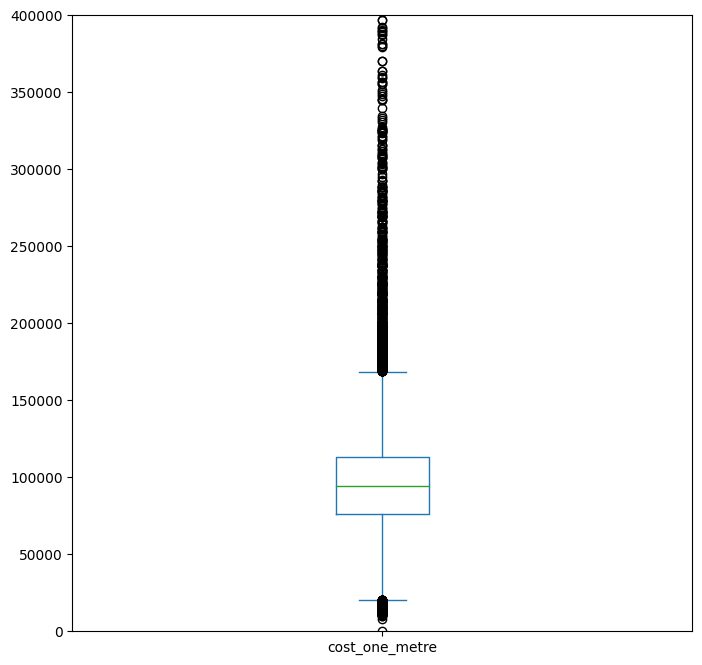

In [234]:
plt.ylim(0,400000)
data['cost_one_metre'].plot(kind="box",figsize=(8, 8));

Средняя стоимость около 100000 за кв.м. Имеются выбросы как вниз, так и вверх. Удалять не будем, посмотрим как эти данные коррелируют с быстротой продажи квартиры.

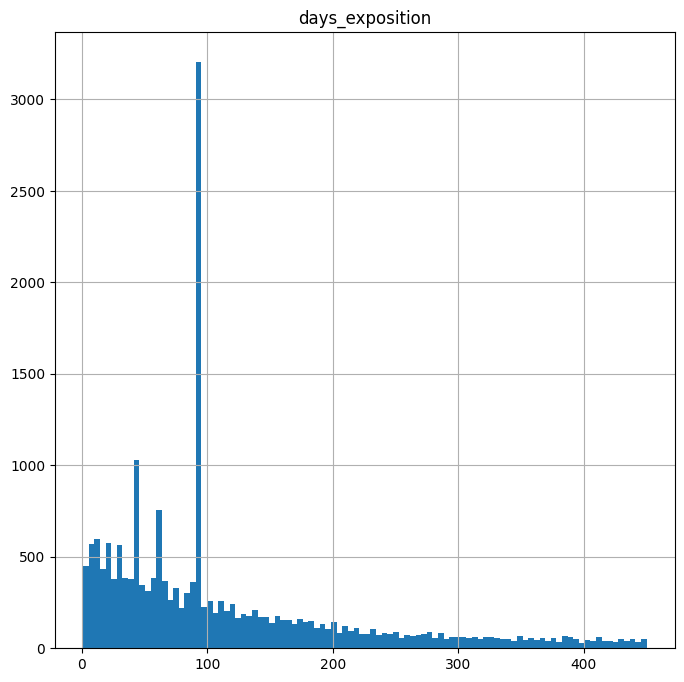

In [235]:
data.hist('days_exposition', bins=100, figsize=(8, 8), range=(1, 450));

Знаем про аномалии, слишком долгие объявления. Не стали их удалять, чтобы посмотреть корреляцию со стоимостью.

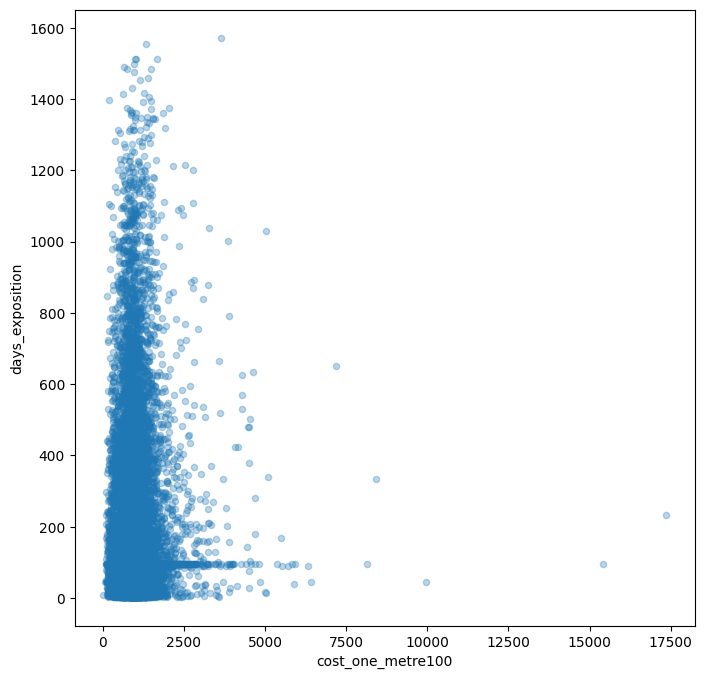

In [237]:
data['cost_one_metre100'] = data['cost_one_metre'] / 100
data.plot(x='cost_one_metre100', y='days_exposition', kind='scatter', alpha=0.3, figsize=(8, 8)) ;

In [238]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_kitchen_living,cost_one_metre,days_publication,month_publication,year_publication,type_floor,cityCenters_nearest_km,cost_one_metre100
0,10,1310000.0,65.6,2019-02-22,3,2.65,5,42.0,4,True,...,NaN,95,49.5,19969.512195,4,2,2019,другой,NaN,199.695122
1,6,980000.0,47.1,2019-04-12,2,2.65,3,29.0,3,True,...,NaN,95,38.0,20806.794055,4,4,2019,последний,NaN,208.067941
2,4,950000.0,44.0,2018-05-05,2,2.65,5,30.0,2,True,...,NaN,156,36.0,21590.909091,5,5,2018,другой,NaN,215.909091
3,6,850000.0,48.0,2016-03-11,2,2.65,5,30.0,5,True,...,NaN,174,39.1,17708.333333,4,3,2016,последний,NaN,177.083333
4,7,820000.0,51.0,2017-12-09,2,2.65,5,32.0,5,True,...,NaN,130,40.5,16078.431373,5,12,2017,последний,NaN,160.784314


**Как быстро продавались квартиры**

Среднее время продажи квартиры в днях: 170
Медианное время продажи квартиры в днях: 95

Количество объявлений, которые сняты через:
35 дней: 108
45 дней: 718
60 дней: 492
95 дней: 2961


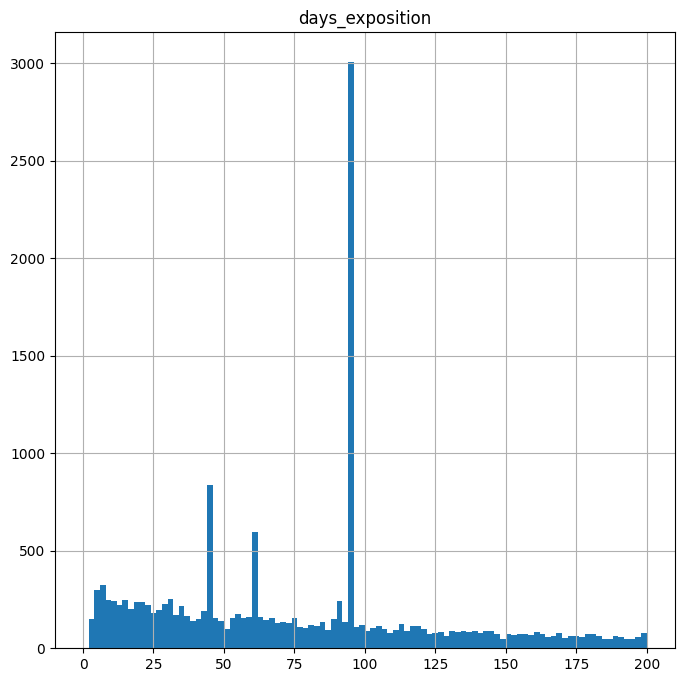

In [240]:
data.hist('days_exposition', bins=100, range = (0,200), figsize=(8, 8));

print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))
print()
print('Количество объявлений, которые сняты через:')

print('35 дней:',data[data['days_exposition']==35]['days_exposition'].count())
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('95 дней:',data[data['days_exposition']==95]['days_exposition'].count())


Cреднее время продажи квартиры составляет 170 дней. Медианное значение - 95 дней. Вероятно такая разница получается из-за квартир, которые продавались долго. На графиках видели много выбросов по таким квартирам.

Т.о., считаем, что быстрый срок продажи квртиры - 95 дней, или около 3-х месяцев, а долгий - 170 дней.

Кстати, медиана на графике выглядит как выброс. Количество объявлений, висевших 95 дней - 2961.


**Проанализируем другие факторы**

In [241]:
#Проверим в каком населенном пункте квартиры продаются быстрее
locality_name_days_exposition = pd.pivot_table(data, index='locality_name', values='days_exposition', aggfunc='median')
locality_name_days_exposition = locality_name_days_exposition.sort_values(by='days_exposition', ascending=False)

locality_name_days_exposition.head(10)

,days_exposition
locality_name,
посёлок Севастьяново,1069.0
деревня Большая Пустомержа,627.0
Высоцк,595.0
посёлок Суйда,503.0
посёлок городского типа Рябово,423.0
посёлок Коробицыно,422.5
деревня Ваганово,418.0
посёлок Алексеевка,416.0
посёлок Глажево,403.0


In [242]:
locality_name_days_exposition.tail(10)

,days_exposition
locality_name,
деревня Нижняя,27.0
деревня Старое Хинколово,19.0
посёлок Платформа 69-й километр,18.0
посёлок Новогорелово,11.0
посёлок Семиозерье,9.0
деревня Малая Романовка,9.0
село Шум,9.0
коттеджный посёлок Счастье,7.0
садовое товарищество Садко,7.0


Видим, что в населенных пунктах разная скорость продажи квартир. Есть населенные пункты, где квартира продается за неделю - это и среднее и медианные значения. И есть населенные пункты, где квартиры можно сказать "непродающиеся". Например, в поселке "Севастьяново" квартиры продаются больше трех лет.

Попробуем оценить, от чего это зависит: от близости к СП, стоимости или может каких других факторов.


In [243]:
#Средняя удаленность населенных пунктов от Санкт-Петербурга - топ 20
locality_name_center_km = pd.pivot_table(data, index='locality_name', values='cityCenters_nearest_km', aggfunc='mean')
locality_name_center_km= locality_name_center_km.sort_values('cityCenters_nearest_km', ascending=True)
locality_name_center_km.head(20)

,cityCenters_nearest_km
locality_name,
Санкт-Петербург,11.605369
посёлок Парголово,19.962265
посёлок Стрельна,23.463415
посёлок Шушары,24.288177
посёлок Левашово,26.000000
посёлок Песочный,26.666666
посёлок Лисий Нос,27.333334
посёлок Александровская,27.500000
посёлок Металлострой,27.566668


Так, установить зависимость между расстоянием до центра и скоростью продажи на этих данных не получается, так как расстояния пропущены, посмотрим, а что там, где нет пропусков.

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21678 entries, 0 to 21677
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21678 non-null  int64         
 1   last_price              21678 non-null  float64       
 2   total_area              21678 non-null  float64       
 3   first_day_exposition    21678 non-null  datetime64[ns]
 4   rooms                   21678 non-null  int64         
 5   ceiling_height          21678 non-null  float64       
 6   floors_total            21678 non-null  int64         
 7   living_area             21678 non-null  float64       
 8   floor                   21678 non-null  int64         
 9   is_apartment            21678 non-null  bool          
 10  studio                  21678 non-null  bool          
 11  open_plan               21678 non-null  bool          
 12  kitchen_area            21678 non-null  float6

In [251]:
pd.pivot_table(data,
               index='locality_name',
               values=["cityCenters_nearest_km", "days_exposition"],
               aggfunc= 'mean',
              ).sort_values('days_exposition', ascending=False)

,cityCenters_nearest_km,days_exposition
locality_name,,
посёлок Севастьяново,NaN,1069.00
деревня Большая Пустомержа,NaN,627.00
посёлок Лисий Нос,27.333334,518.00
посёлок Молодёжное,65.599998,509.60
посёлок городского типа Рябово,NaN,498.75
...,...,...
деревня Малая Романовка,NaN,9.00
село Шум,NaN,9.00
садовое товарищество Садко,NaN,7.00


In [252]:
data_center_expos = pd.pivot_table(data.query('~cityCenters_nearest_km.isna()'),
               index='locality_name',
               values=["cityCenters_nearest_km", "days_exposition"],
               aggfunc= 'median',
              ).sort_values('days_exposition', ascending=False)
d_near_short = data_center_expos.head(10)
d_near_long = data_center_expos.tail(10)


print(d_near_short)
print(d_near_long)

                    cityCenters_nearest_km  days_exposition
locality_name                                              
посёлок Сапёрный                      36.0            284.0
посёлок Усть-Ижора                    28.0            245.5
посёлок Репино                        43.0            238.0
Зеленогорск                           53.0            144.5
Павловск                              33.0            121.0
посёлок Молодёжное                    66.0            121.0
посёлок Лисий Нос                     28.0            119.0
Красное Село                          29.0            106.0
посёлок Стрельна                      24.0             97.0
посёлок Понтонный                     32.0             95.0
                         cityCenters_nearest_km  days_exposition
locality_name                                                   
Пушкин                                     28.0             95.0
Петергоф                                   34.0             95.0
Ломоносов           

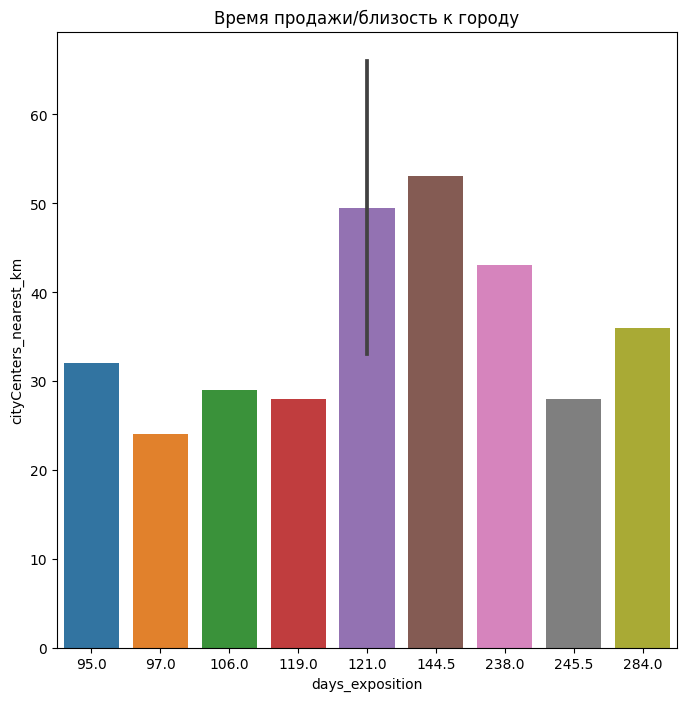

In [254]:
# Топ населенных пунктов в которых квартры продаются быстрее всего, хотелось бы еще чтоб на диаграммах были
plt.figure(figsize=(8, 8))

sns.barplot(data=d_near_short, x = d_near_short['days_exposition'],
            y = d_near_short['cityCenters_nearest_km']).set_title('Время продажи/близость к городу');


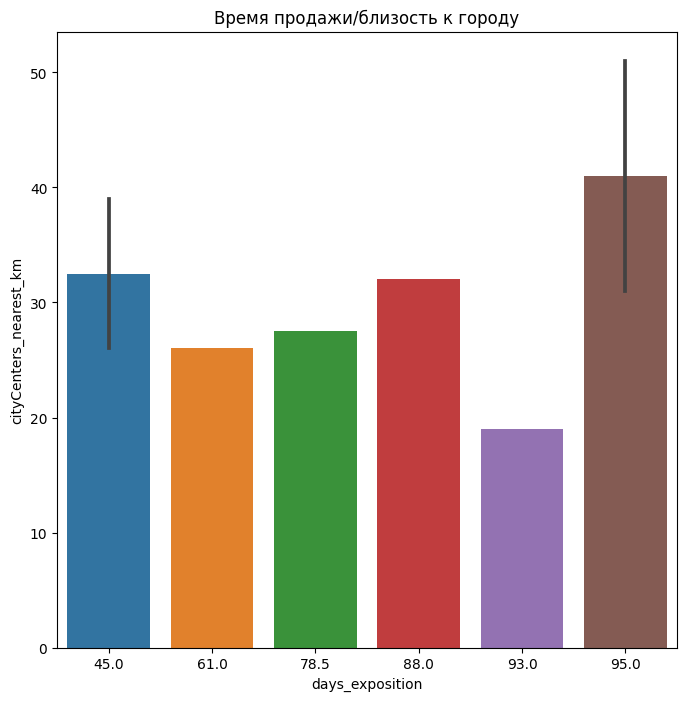

In [256]:
# Топ населенных пунктов в которых квартры продаются дольше всего
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.barplot(data=d_near_long, x = d_near_long['days_exposition'],
            y = d_near_long['cityCenters_nearest_km']).set_title('Время продажи/близость к городу');


Можно сделать вывод о том, что в поселке "Саперный" квартиры продаются очень долго. А в поселках "Песочный" и "Белоостров" квартиры можно продать в среднем за полтора месяца, что можно считать быстрой продажей.

Есть некоторые населенные пункты (посёлок Семиозерье, деревня Малая Романовка, село Шум, садовое товарищество Садко, коттеджный посёлок Счастье),где квартиры продаются в течение недели, зависимость от центра отследить нельзя, так как они все имеют пропущенные значения.

В посёлке Севастьяново квартиру продать сложно в течение нескольких лет.

Надо еще проверить сколько квартир в этих населеных пунктах выставлено на продажу.

In [257]:
data.groupby('locality_name')['locality_name'].count().sort_values().tail(20)

locality_name
посёлок Бугры                 96
Волхов                       105
Сланцы                       107
Кириши                       114
Сертолово                    128
Ломоносов                    133
деревня Новое Девяткино      136
Красное Село                 159
Сестрорецк                   176
Петергоф                     195
Выборг                       220
Гатчина                      290
посёлок Парголово            318
Колпино                      320
Пушкин                       346
Всеволожск                   368
посёлок Шушары               407
Кудрово                      417
Мурино                       497
Санкт-Петербург            14323
Name: locality_name, dtype: int64

Факторы, влияющие на общую стоимость объекта

In [258]:
data['type_floor_num'] = data.apply(lambda x: 0 if (x.floor == 1)
                                    else (2 if (x.floor == x.floors_total)
                                          & isinstance(x.floors_total,int)
                                          else 1), axis=1
                                   )

In [259]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_kitchen_living,cost_one_metre,days_publication,month_publication,year_publication,type_floor,cityCenters_nearest_km,cost_one_metre100,type_floor_num
0,10,1310000.0,65.6,2019-02-22,3,2.65,5,42.0,4,True,...,95,49.5,19969.512195,4,2,2019,другой,NaN,199.695122,1
1,6,980000.0,47.1,2019-04-12,2,2.65,3,29.0,3,True,...,95,38.0,20806.794055,4,4,2019,последний,NaN,208.067941,2
2,4,950000.0,44.0,2018-05-05,2,2.65,5,30.0,2,True,...,156,36.0,21590.909091,5,5,2018,другой,NaN,215.909091,1
3,6,850000.0,48.0,2016-03-11,2,2.65,5,30.0,5,True,...,174,39.1,17708.333333,4,3,2016,последний,NaN,177.083333,2
4,7,820000.0,51.0,2017-12-09,2,2.65,5,32.0,5,True,...,130,40.5,16078.431373,5,12,2017,последний,NaN,160.784314,2


Проверим как стоимость квартиры связана с другими параметрами.

In [260]:
line_list = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor_num',
             'days_publication', 'month_publication', 'year_publication',
            'airports_nearest','parks_nearest','parks_around3000','ponds_nearest','ponds_around3000',
             'days_exposition','cityCenters_nearest']

for param in line_list:
    correlation = data['last_price'].corr(data[param])
    print(f'Корреляция между last_price и {param} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 65.47%
Корреляция между last_price и living_area составляет: 51.00%
Корреляция между last_price и kitchen_area составляет: 50.12%
Корреляция между last_price и rooms составляет: 37.03%
Корреляция между last_price и type_floor_num составляет: 4.26%
Корреляция между last_price и days_publication составляет: -1.24%
Корреляция между last_price и month_publication составляет: -0.05%
Корреляция между last_price и year_publication составляет: -3.60%
Корреляция между last_price и airports_nearest составляет: -3.86%
Корреляция между last_price и parks_nearest составляет: -0.40%
Корреляция между last_price и parks_around3000 составляет: 19.41%
Корреляция между last_price и ponds_nearest составляет: -10.24%
Корреляция между last_price и ponds_around3000 составляет: 19.50%
Корреляция между last_price и days_exposition составляет: 7.28%
Корреляция между last_price и cityCenters_nearest составляет: -27.70%


Прямая зависимость стоимости квартиры от общей площади, на цену также влияет площади гостинной, кухни, количество комнат. Связи между днем публикации не наблюдается. На стоимость практические не влияет этаж квартиры.

А вот корреляция между стоимостью и временем продажи - слабая. Это тоже вполне объяснимо. Если нет квартир с реально заниженной или завышенной стоимостью, то для каждой квартиры свой покупатель.

Зависимости между стоимостью квартиры и удаленностью парка практически никакой, но наличие парка в пределах 3 км поднимает квартиру в цене. С удаленностью водоемов - зависимость обратная, чем дальше расположен водоем, тем стоимость квартиры ниже (хотя этот параметр вряд ли является таким уж существенным), но вот наличие водоема в пределах 3 км также влияет на ее стоимость.

Также незначительная обратная зависимость с удаленностью от аэропорта. Хотя это странно.

Наблюдается существенная обратная зависимость стоимости квартир от удаленности от центра. Что также логично. Чем ближе к центру - тем квартира дороже.

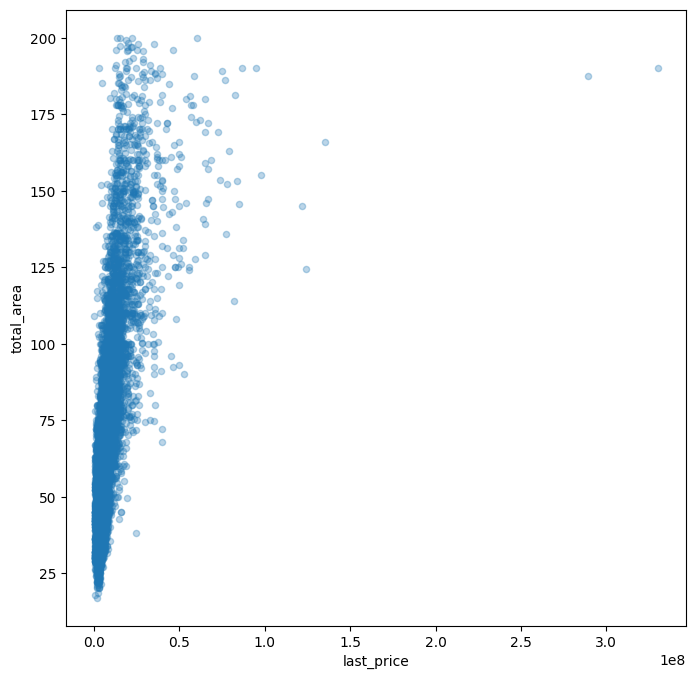

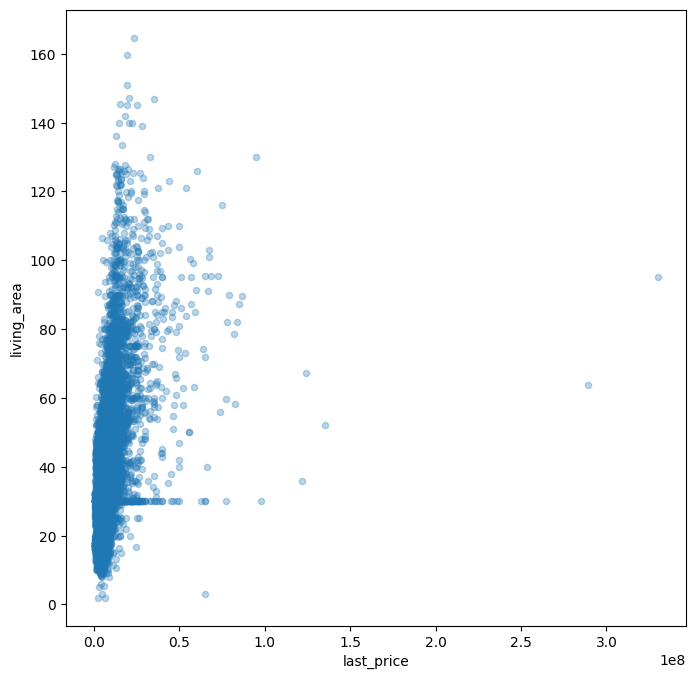

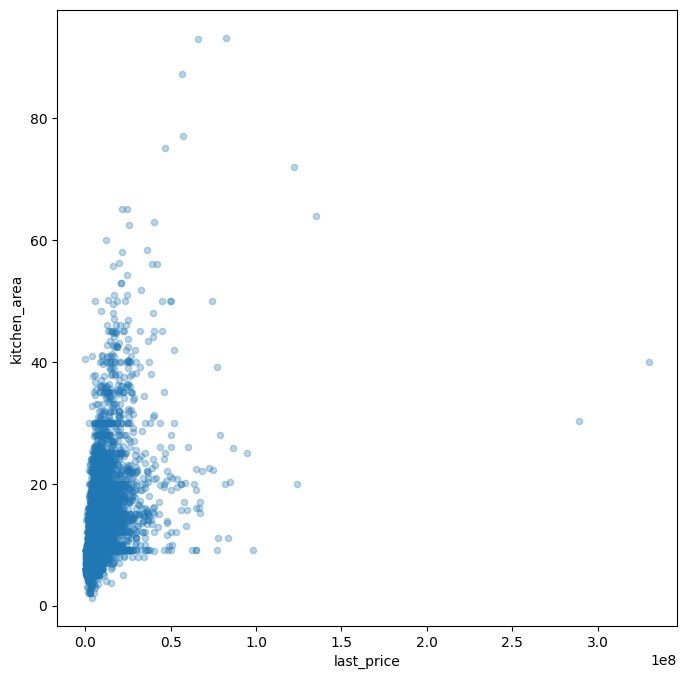

In [263]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, figsize=(8,8));
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize=(8,8));
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3,figsize=(8,8));

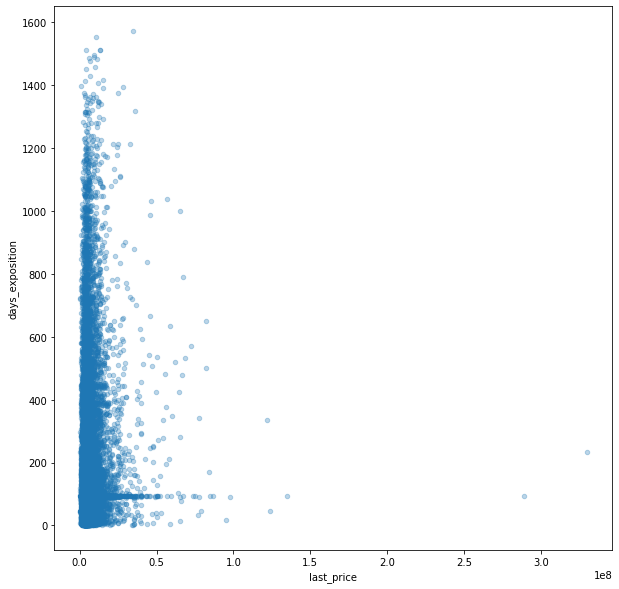

In [ ]:
data.plot(x='last_price', y='days_exposition', kind='scatter', alpha=0.3,figsize=(10,10));

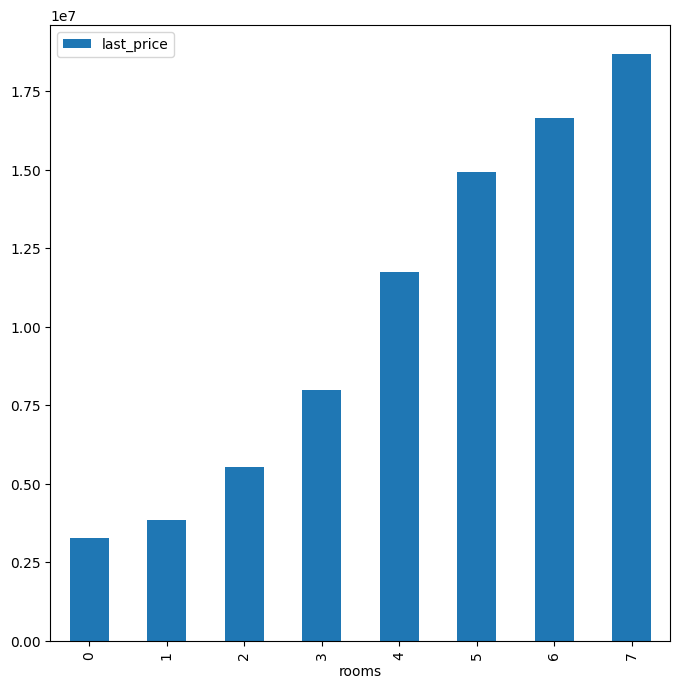

In [264]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar', figsize=(8,8));

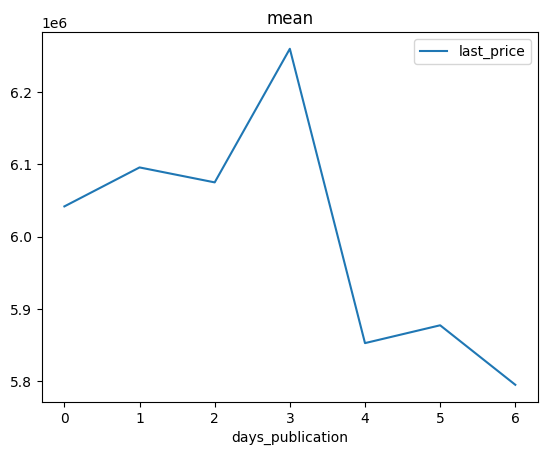

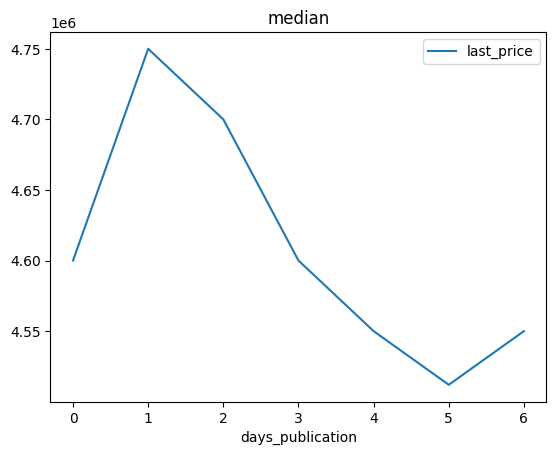

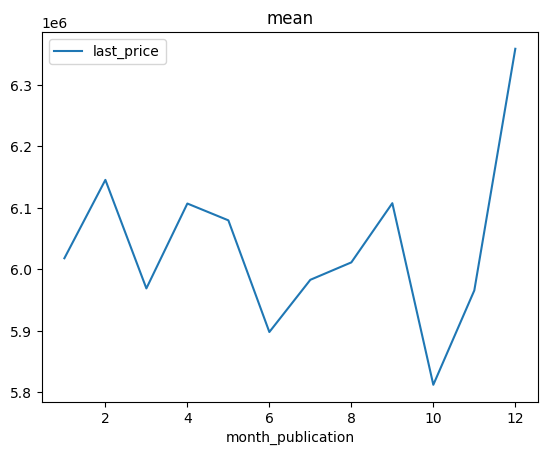

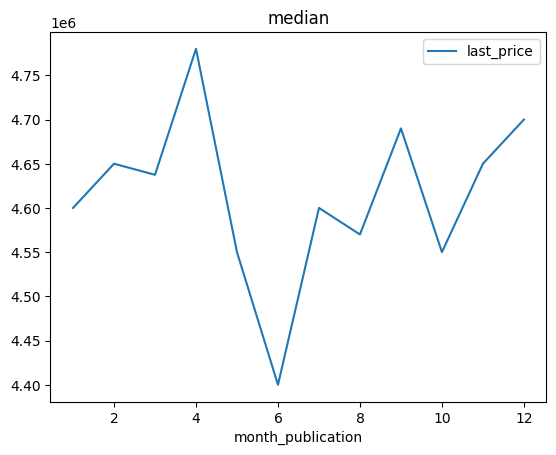

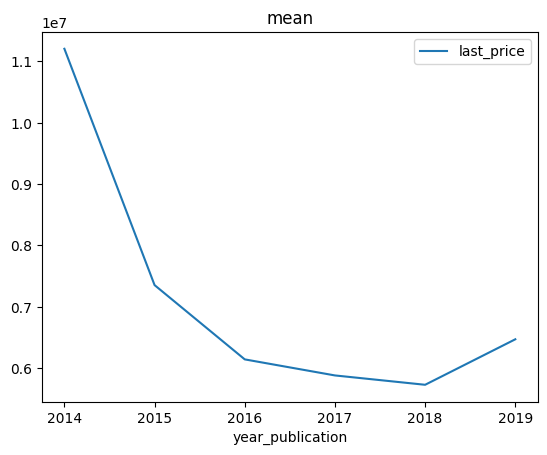

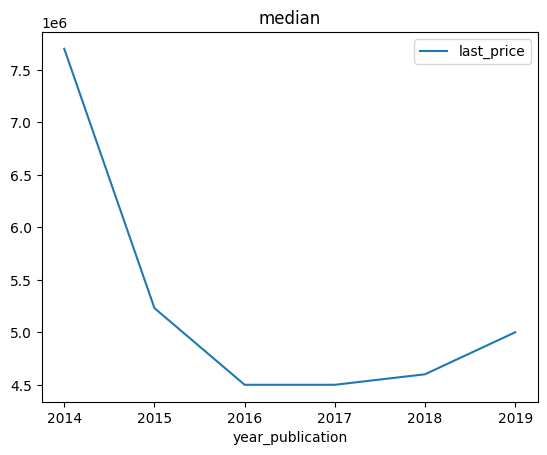

In [265]:
data.pivot_table(index='days_publication',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='days_publication',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='month_publication',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month_publication',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='year_publication',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year_publication',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

В 2014-2015 годах наблюдается резкое снижение цен на  квартиры. Практически в половину. В 2016 цена достигает минимума и начиная 2016 года цена потихоньку растут. В 2019 году стоимость на квартиры все равно почти в два раза ниже чем в 2014 году.


Цена по убыванию зависит от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат.

Цена  зависит несущественно от:

- этажа, на котором расположена квартира;
- даты размещения.

Анализ диаграмм, вычисленная корреляция позволяют сделать выод, что на стоимость квартиры влияют следующие показатели:
- общая площадь. Зависимость стоимости квартиры от общей площади прямая - чем  больше площадь, темы выше стоимость квартиры.
- площадь кухни и гостинной. Эти два показателя логично вытекают из предыдущего и прямо коррелируют со стоимостью квартиры. Причем эти два показателя влияют на стоимость квартиры как вместе, так и по отдельности. Т.е. чем меньше площадь кухни, тем меньше стоимость квартиры, аналогично и с гостинной.
- Количество комнат и цена на квартиру связаны прямой зависимостью. С увеличением комнат стоимость квартиры повышается, даже при одинаковой площади.

Есть зависимость стоимости от этажа, на котором расположена квартира, но она незначительна. Квартиры на 1 и последнем этаже стоят немного дешевле.

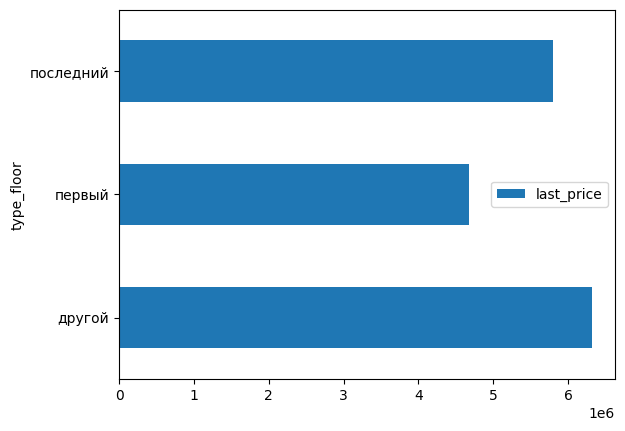

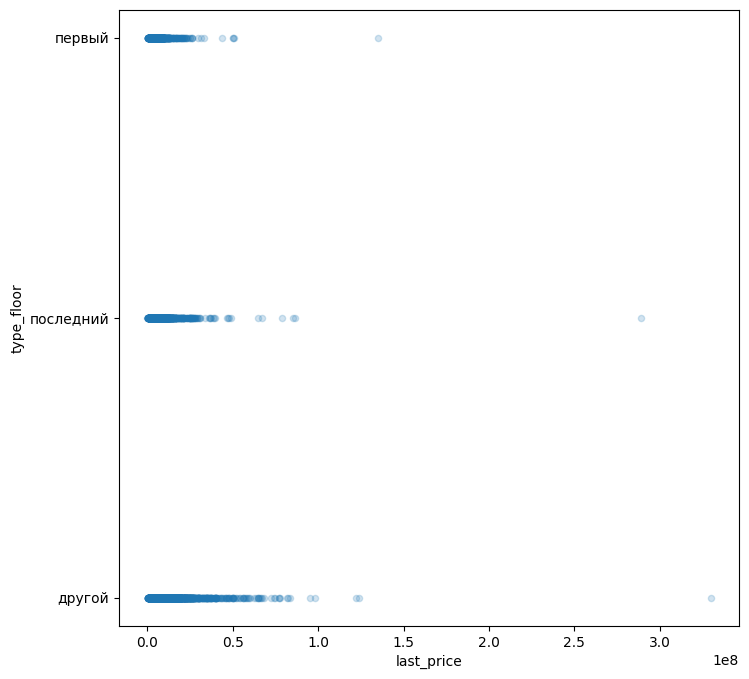

In [266]:
data.pivot_table(index='type_floor',values='last_price').plot(y='last_price', kind='barh');

data.plot(x='last_price', y='type_floor', kind='scatter', alpha=0.2, figsize=(8,8));

Cредняя цена одного квадратного метра в топ-10 населенных пунктах

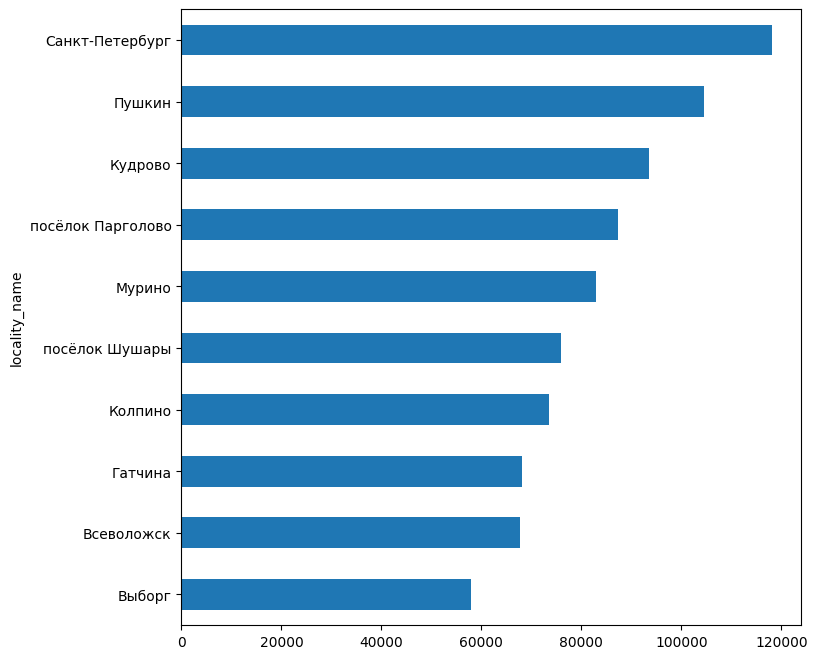

In [267]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh', figsize=(8,8));

Самые дорогие квартиры расположены в Санкт-Петербурге, самые дешевые в Выборге.

Расстояние до центра города

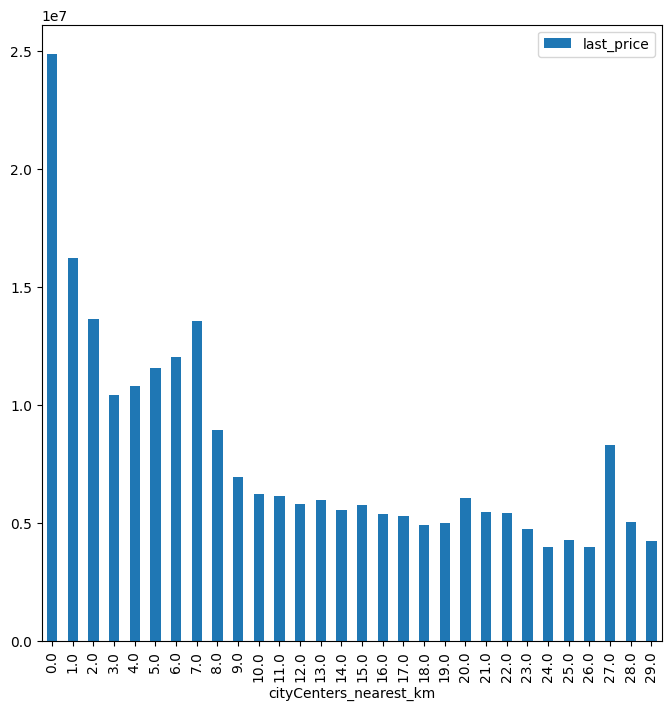

In [268]:
data[data['locality_name']=='Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', \
                                                           values='last_price', aggfunc='mean').plot(kind='bar', figsize=(8, 8));

Недвижимость, расположенная в пределах  1 км от центра, имеет более высокую цену. С удалением от центра цена снижается.
Можно выделить такие ценовые  категории, в зависимости от удаленности, от 1 км до 7 км. От 8 км до 27 км.
На 27 км есть какое-то место, где цены на квартиры выше. Возможно это какой-нибудь элитный район.

**Общий вывод**

Проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

- Больше всего выставлено квартир на продажу площадью от 35 до приблизительно 53 кв.м. Учитывая, что больше всего объявлений 1-2х комнатных квартир, то это вполне подходящие площади.<br><br>
- На треть меньше объявлений о продаже квартир площадью от 53 до 75 кв.м. Приблизительно в равных количествах объявлений о продаже квартир до 30 кв.м и от 75 до примерно 85 кв.м. <br><br>
- Чаще всего площадь гостиной около 20 кв.м., реже от 40 до 60. В большинстве случаев кухни имеют площадь до 20 кв.м.
- Площадь кухни соотносится с площадью гостиной и общей площадью продаваемых квартир. По большей части в квартирах от 0 до 2 балконов. В основном – 1 балкон, Также есть квартиры где есть 2 балкона или он отсутствует. <br><br>
- Самые частые объявления о продаже недвижимости, размещенной в домах, имеющих не более 5 этажей. В половину меньше - до 10 этажей.<br><br>
- Больше всего квартир продается не на первом и не на последнем этажах. Первых и последних этажей одинаково мало.<br><br>
- Больше всего объявлений о продаже квартир, расположенных на расстоянии от 10 до 15 км от центра. Чуть меньше объявлений в пределах 15-17 км. И дальше на уменьшение - в 5 км, еще меньше 7км и 20-23км, 30.<br><br>
- Парки расположены от продаваемых квартир как в непосредственной близости, так и на значительном расстоянии. В большинстве случаев удаленность от парка в районе 500 м - что достаточно близко.<br><br>
- Так же как и парки, водоемы расположены от продаваемых квартир как в непосредственной близости, так и на значительном расстоянии. В большинстве случаев удаленность от водоема в районе 500 м. Большинство парков имеют водоемы.<br><br>
- Среднее время продажи квартиры составляет 170 дней. Медианное значение - 95 дней. Вероятно, такая разница получается из-за квартир, которые продавались долго. На графиках видели много выбросов по таким квартирам.<br><br>
- Быстрый срок продажи квартиры - 95 дней, или около 3-х месяцев, а долгий - 170 дней. <br><br>

- Есть и некоторые особенные населенные пункты. В поселке "Саперный" квартиры продаются очень долго. А в поселках "Песочный" и "Белоостров" квартиры можно продать в среднем за полтора месяца, что можно считать быстрой продажей.<br><br>
- Также есть некоторые населенные пункты, где квартиры продаются в течение недели (посёлок Семиозерье, деревня Малая Романовка, село Шум, садовое товарищество Садко, коттеджный посёлок Счастье), зависимость от центра отследить нельзя, так как они все имеют пропущенные значения.<br><br>
- В посёлке Севастьяново квартиру продать сложно в течение нескольких лет.<br><br>

- Зависимости между стоимостью квартиры и удаленностью парка практически никакой, но наличие парка в пределах 3 км поднимает квартиру в цене. С удаленностью водоемов - зависимость обратная, чем дальше расположен водоем, тем стоимость квартиры ниже (хотя этот параметр вряд ли является таким уж существенным), но вот наличие водоема в пределах 3 км также влияет на ее стоимость.<br><br>
- Также незначительная обратная зависимость с удаленностью от аэропорта. Хотя это странно.
<br><br>
- Наблюдается существенная обратная зависимость стоимости квартир от удаленности от центра. Что также логично. Чем ближе к центру - тем квартира дороже.<br><br>

- Самые дорогие квартиры расположены в Санкт-Петербурге. Средняя стоимость квартиры около 100000 за кв.м. <br><br>

- Недвижимость, расположенная в пределах 1 км от центра, имеет более высокую цену. С удалением от центра цена снижается. Можно выделить такие ценовые категории, в зависимости от удаленности, от 1 км до 7 км. От 8 км до 27 км. На 27 км есть какое-то место, где цены на квартиры выше. Возможно это какой-нибудь элитный район.<br><br>

Анализ диаграмм, вычисленная корреляция позволяют сделать вывод, что на стоимость квартиры влияют следующие показатели:

- **общая площадь**. Зависимость стоимости квартиры от общей площади прямая - чем больше площадь, темы выше стоимость квартиры.
- **площадь кухни и гостиной**. Эти два показателя логично вытекают из предыдущего и прямо коррелируют со стоимостью квартиры. Причем эти два показателя влияют на стоимость квартиры как вместе, так и по отдельности. Т.е. чем меньше площадь кухни, тем меньше стоимость квартиры, аналогично и с гостиной.
- **Количество комнат и цена на квартиру связаны прямой зависимостью**. С увеличением комнат стоимость квартиры повышается, даже при одинаковой площади.
- **Есть зависимость стоимости от этажа, на котором расположена квартира, но она незначительна**. Квартиры на 1 и последнем этаже стоят немного дешевле.





